

#Capstone Project  

Topic:Credit Card Fraud Detection.

Prepared by:**Maimana Kowatly**.

April 2025.

batch: ML C62/February 2024
************************************************************************


# Problem Statement

- The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

# Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.



In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.



## Understanding and defining fraud
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

Manipulation/alteration of genuine cards
Creation of counterfeit cards
Stealing/loss of credit cards
Fraudulent telemarketing

## About the Dataset
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.


- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


- The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced; the positive class (frauds) accounts for 0.172% of all transactions.


- It contains only numerical input variables resulting from a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA; the only features not transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction amount, which can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and takes value 1 in case of fraud and 0 otherwise.


- Given the class imbalance ratio, we recommend measuring accuracy using the Area Under the Precision-Recall Curve (AUPRC). The confusion matrix accuracy is not meaningful for unbalanced classification.


## Metrics Used
**ROC-AUC Score**
Measures the area under the ROC curve

Evaluates the model's ability to distinguish between classes

Robust against class imbalance

**F1 Score**
Harmonic mean of precision and recall

Useful when there’s an uneven class distribution

Captures both false positives and false negatives

**Precision**
The proportion of predicted frauds that are actually fraud

High precision means fewer false positives

**Recall**
The proportion of actual frauds that are correctly predicted

High recall means fewer false negatives (missed fraud cases)

For this project, we prioritize F1-score and ROC-AUC as they are most informative for imbalanced datasets.

Report link: https://docs.google.com/document/d/1wVmgjihYvxFtxbNbMn0DDPYVD0f-YluGlATHBOjC264/edit?usp=sharing

github repository link: https://github.com/Maimana-Kowatly/Credit-card-fraud-detection.git

_____________________________________
**notebook link with using default train/test split (not stratified)**

http://colab.research.google.com/drive/1xxiD_cWdMGlxKKOjxKR2uqCwzEtT6wCU#scrollTo=2R6x0GJBaHMN

**note**: the current notebook is stratifed split

## Importing Libraries

In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.3 MB/s eta 0:00:00


In [2]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Data Exploration and Preprocessing

In [3]:
##mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#To read csv File from google drive
file_path = 'drive/MyDrive/upgrad/creditcard.csv'
df = pd.read_csv(file_path)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [5]:
##data frame shape (columns,rows)
df.shape

(284807, 31)

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [7]:
##check null value in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

In [9]:
# Calculate the percentage of fraud transactions
fraud_percentage = (df['Class'].value_counts(normalize=True)[1] *100)
# Print the percentage of fraud transactions
print(f'Percentage of Fraud transactions: {fraud_percentage:.2f}')

Percentage of Fraud transactions: 0.17


In [10]:
# Calculate the average transaction amount for fraud transactions
average_fraud_amount = df[df['Class'] == 1]['Amount'].mean()
average_fraud_amount
# Print the average transaction amount for fraud transactions
print(f'The average transaction amount for fraud transactions: {average_fraud_amount}')

The average transaction amount for fraud transactions: 122.21132113821139


###Handling Missing Values

In [11]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Time   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  \
Total     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  \
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V27  V28  Amount  Class  
Total    0.0  0.0     0.0    0.0  
Percent  0.0  0.0     0.0    0.0

there is no missing data in the dataset

###Outliers Treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, no need to performe any outliers treatment on the dataframe.

### Calculating percentage distribution for the normal & fraud classes

In [12]:
# calculate the precentage of each class

classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(np.float64(99.83), np.float64(0.17))

### **Data Visualization**

distribution of transaction amounts for fraud transactions

#### bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

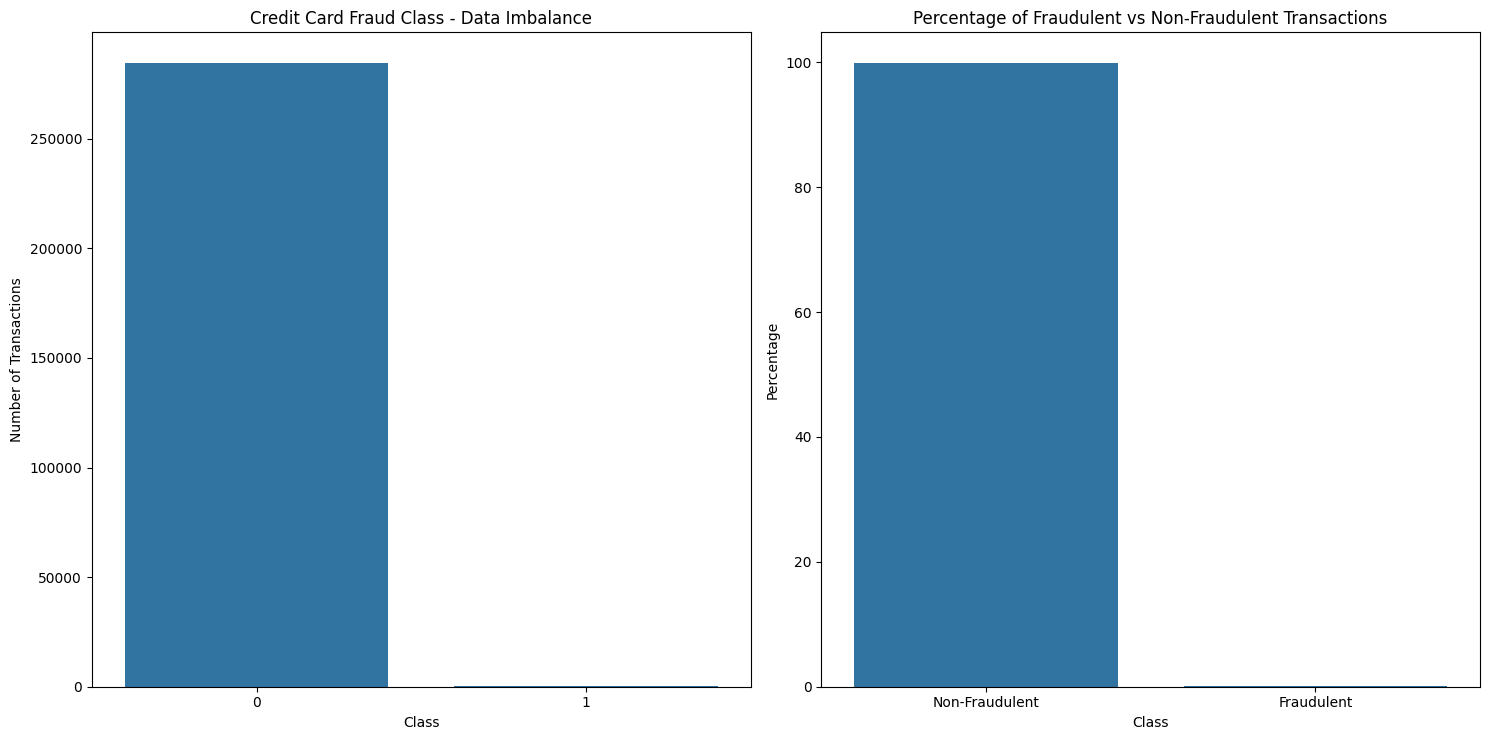

In [13]:
# Create a bar plot
# Calculate fraud counts
fraud_count = df[df['Class'] == 1].shape[0]
non_fraud_count = df[df['Class'] == 0].shape[0]

# Calculate the percentage of fraudulent and non-fraudulent transactions
total_count = df.shape[0]
fraud_share = (fraud_count / total_count) * 100
normal_share = (non_fraud_count / total_count) * 100

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15,7.5))

# Plot 1: Count of Fraudulent vs Non-Fraudulent Transactions
sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_ylabel("Number of Transactions")
axes[0].set_xlabel("Class")
axes[0].set_title("Credit Card Fraud Class - Data Imbalance")

# Plot 2: Fraud Percentage
fraud_percentage = pd.DataFrame({
    'Class': ['Non-Fraudulent', 'Fraudulent'],
    'Percentage': [normal_share, fraud_share]
})
sns.barplot(x='Class', y='Percentage', data=fraud_percentage, ax=axes[1])
axes[1].set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions')

plt.tight_layout()
plt.show()

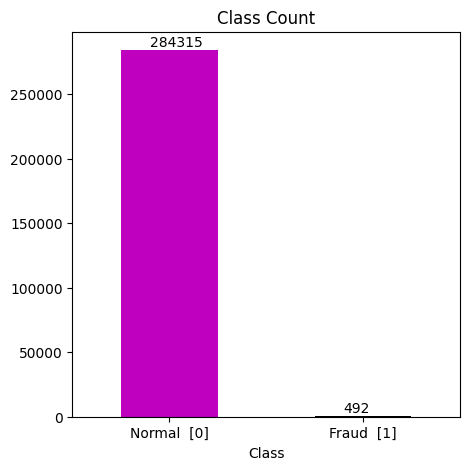

In [14]:
diff_class = df['Class'].value_counts()
diff_class.plot(kind='bar', color=['m', 'k'], figsize=(5, 5))
plt.xticks(range(2), ['Normal  [0]', 'Fraud  [1]'], rotation=0)
for i, v in enumerate(diff_class):
    plt.text(i-0.1, v+3000, str(v))
plt.title('Class Count')
plt.show()

##### Observation



Extreme Class Imbalance: Only 492 Out of 284,807 Transactions Are Fraudulent.

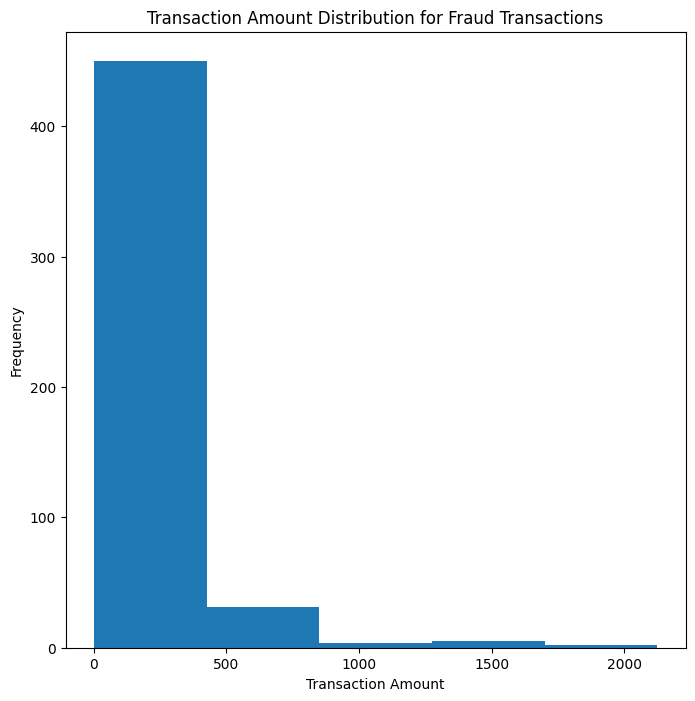

In [15]:
# Separate the data for fraud transactions
fraud_amount = df[df['Class'] == 1]['Amount']
fraud_amount
# Plot the distribution of transaction amounts for fraud transactions
plt.figure(figsize=(8,8))
plt.hist(fraud_amount, bins=5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution for Fraud Transactions')
plt.show()

less amount has the most fraud transaction

#### scatter plot to observe the distribution of classes with **TIME**

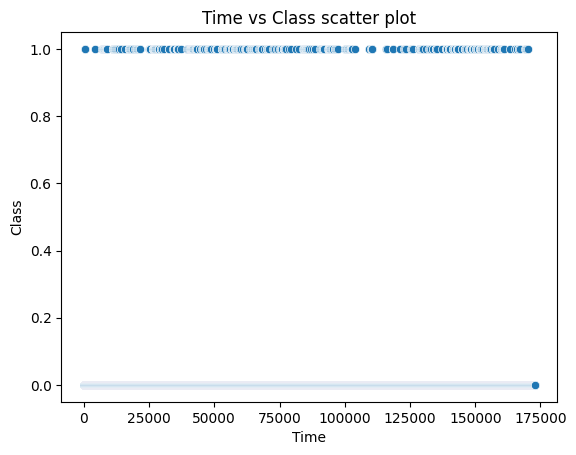

In [16]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df["Time"], y=df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

##### Observation

The distribution of fraudulent transactions over time does not reveal any significant pattern. Both fraudulent and non-fraudulent transactions are spread uniformly across the time variable, indicating that time is not a strong distinguishing factor between the two classes.

Dropping `Time` column as this feature is not going to help in the model building.

In [17]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

#### scatter plot to observe the distribution of class with **AMOUNT**

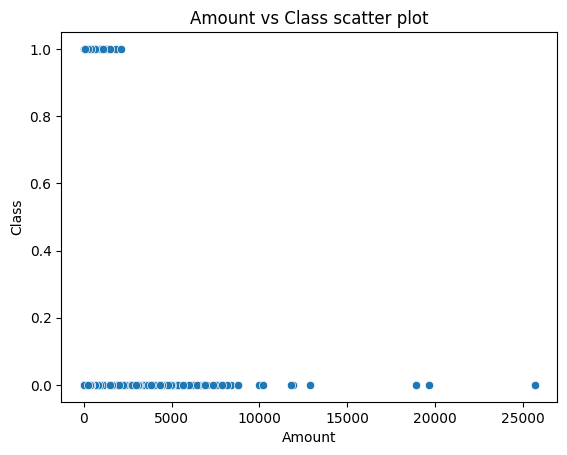

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Amount"], y=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

#####Observation

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

#### Plotting the distributions of all the featuers

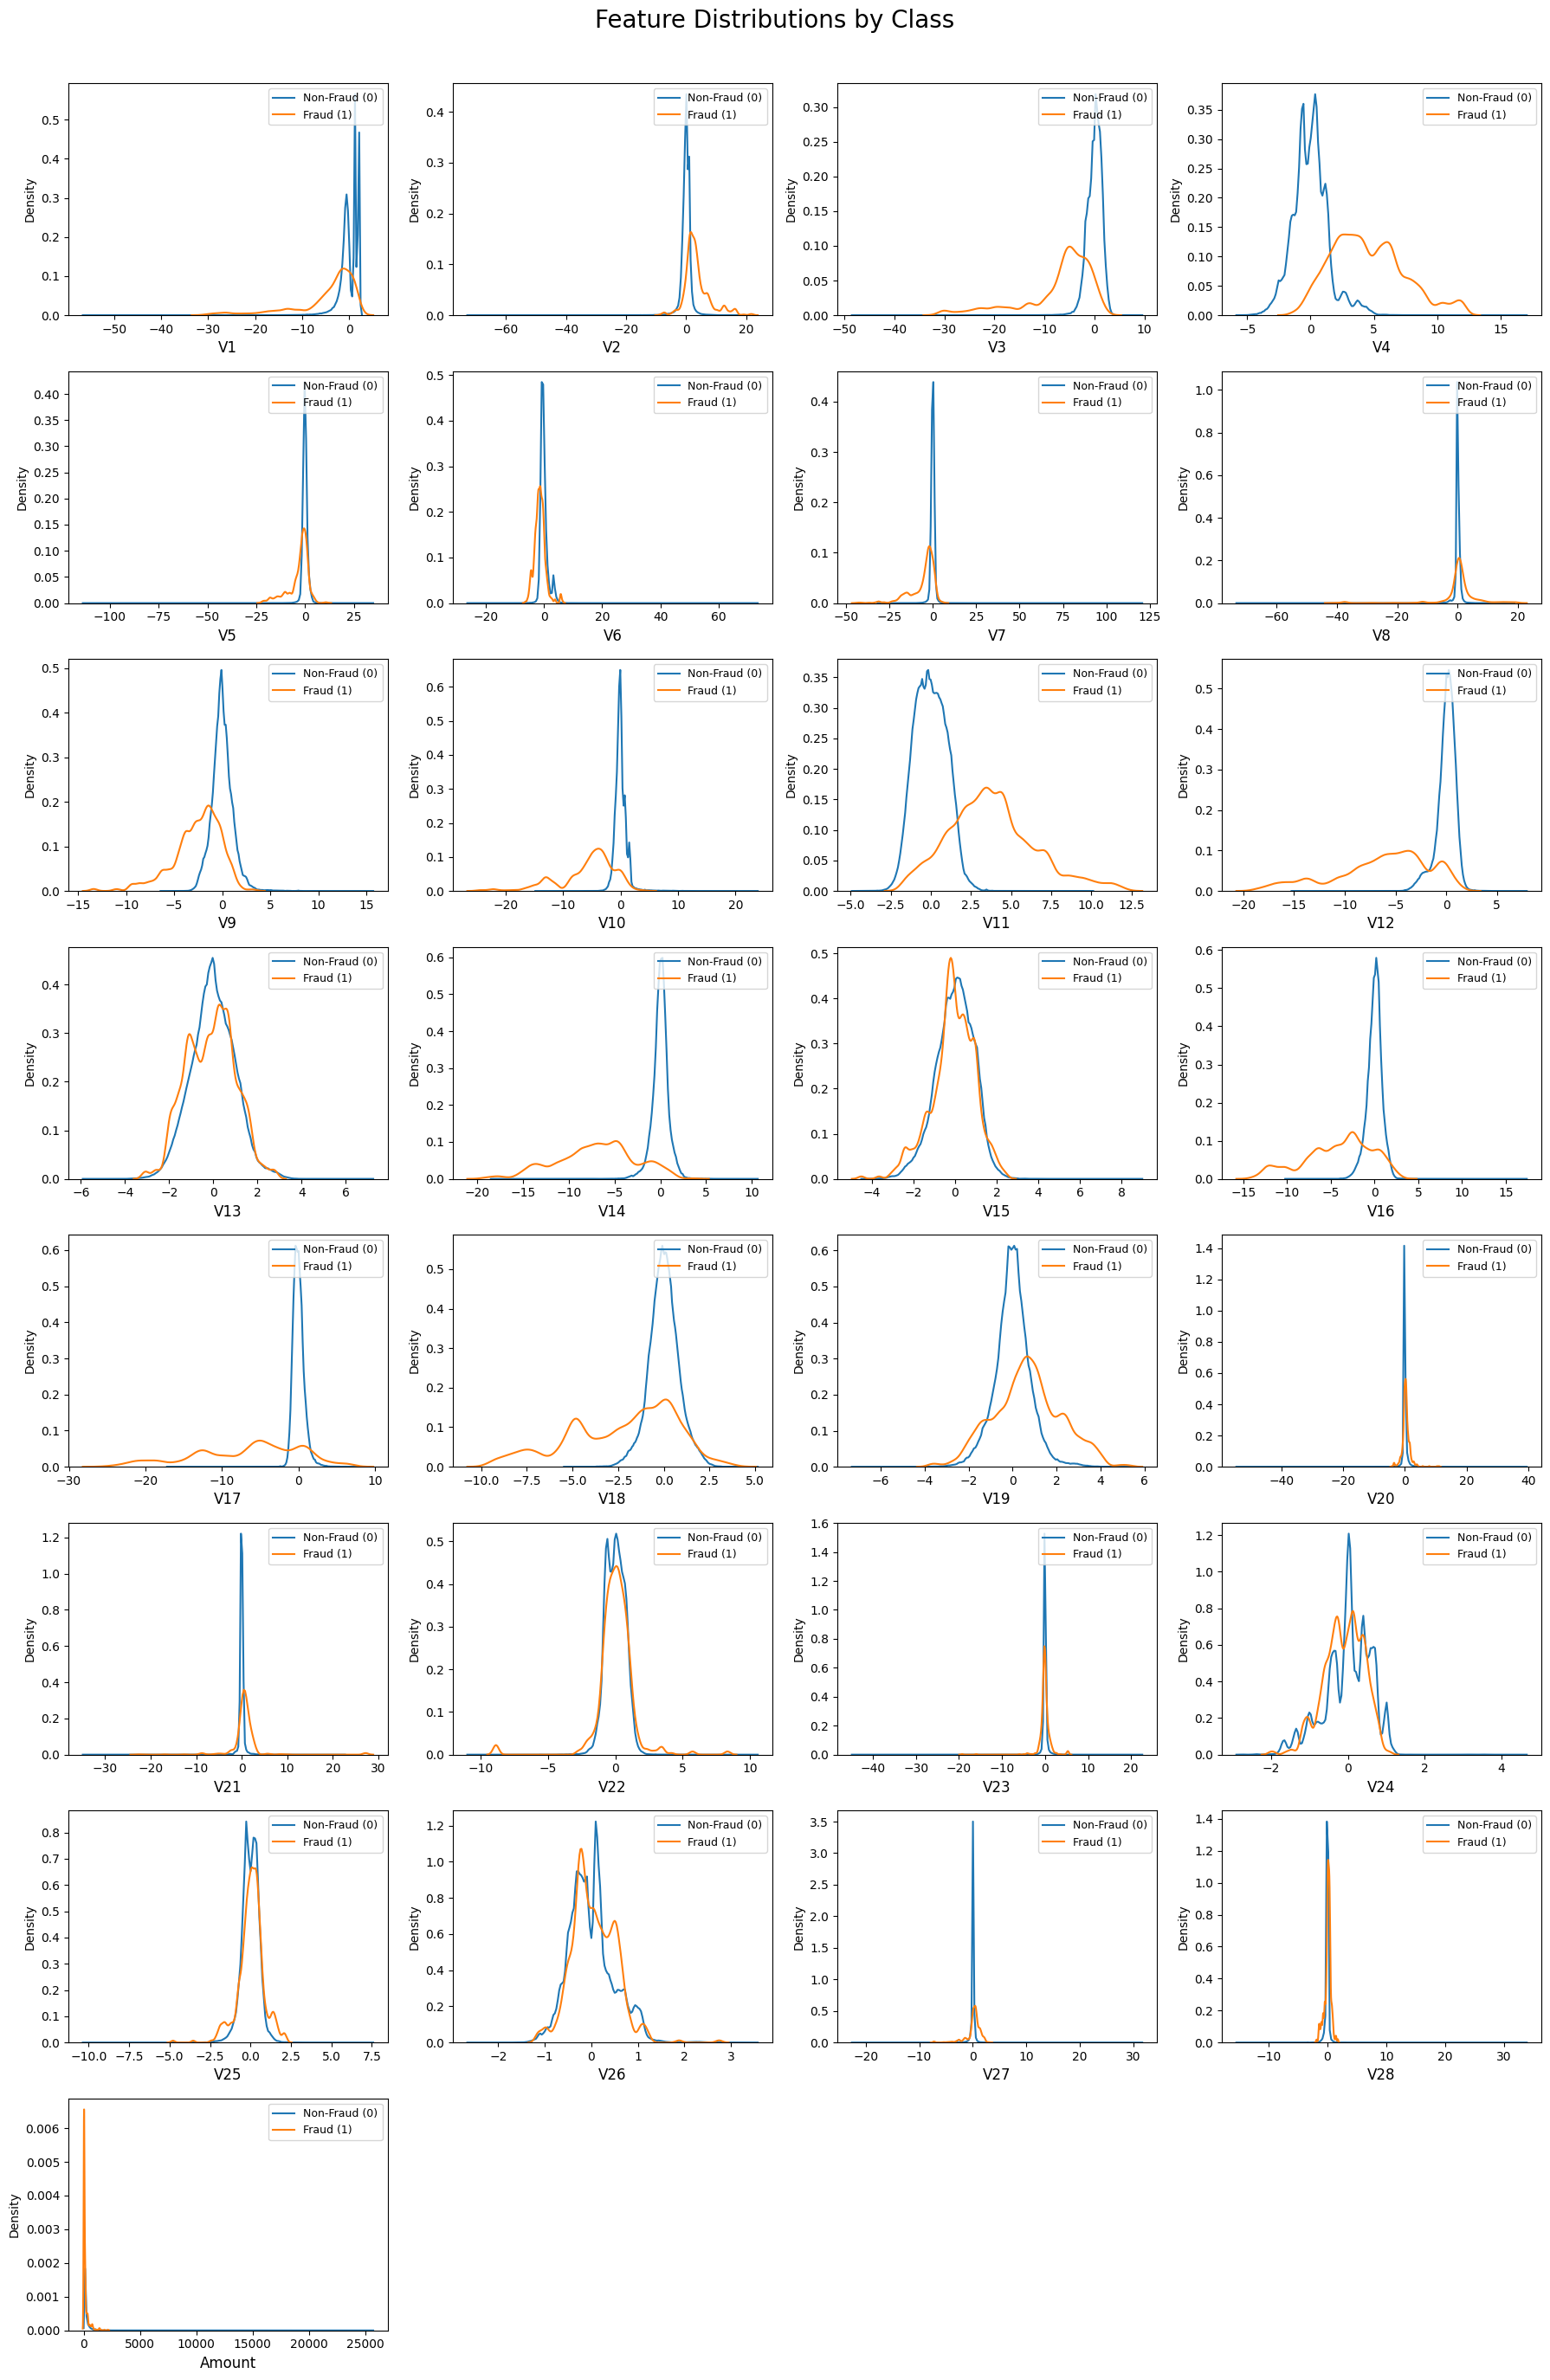

In [19]:
# Plotting all the variable in displot to visualise the distribution
features = df.columns.drop("Class")
t0 = df[df["Class"] == 0]
t1 = df[df["Class"] == 1]

# Create subplots
fig, axes = plt.subplots(8, 4, figsize=(18, 28))
fig.suptitle("Feature Distributions by Class", fontsize=20)
axes = axes.flatten()

# Plot KDE for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Non-Fraud (0)", ax=ax)
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Fraud (1)", ax=ax)
    ax.set_xlabel(feature, fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(loc="upper right", fontsize=9)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Observation




Most feature distributions for fraudulent and non-fraudulent transactions show significant overlap. This indicates that individual features may not be strong discriminators on their own and suggests the need for combinations of features or advanced modeling techniques to effectively distinguish between the two classes.

### Splitting the data into train & test data

In [20]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [21]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:

#Counts the total number of fraudulent transactions in the full dataset.
print(np.sum(y))
#Counts the number of fraudulent transactions in the training set
print(np.sum(y_train))
#Counts the number of fraudulent transactions in the test set.
print(np.sum(y_test))

492
394
98


### Feature Scaling

🎯 We need to scale `Amount` column.

> Without scaling, Amount would dominate the model just because its values are larger



In [23]:
print("Minimum Amount:", df['Amount'].min())
print("Maximum Amount:", df['Amount'].max())
print("Mean Amount:", df['Amount'].mean())

Minimum Amount: 0.0
Maximum Amount: 25691.16
Mean Amount: 88.34961925093133


In [24]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training 'Amount' feature and transform it
X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])

# Transform the 'Amount' feature in the test set using the same scaler
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

In [25]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
198723  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
82325  -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

              V8        V9       V10       V11       V12       V13       V14  \
265518  1.139880  1.406819 -0.157403 -0.113729  0.510277  0.061258 -0.066555   
180305  0.674782  0.045826  0.284864 -0.254903  0.325560 -0.405327  0.721068   
42664  -5.037523  0.000772 -2.009561 -0.386845  1.820161  0.747777  0.122746   
198723  0.010010 -1.118447  1.756121  0.093136 -0.722450 -0.468757 -0.195288   
82325  -0.113817 -0.044782 -0.558955 -0.251076 -0.054708 -0.782698  0.134659   

             V15       V16       V17       V18       V19       V20       V21  \
265518  1.328702  0.352514 -0.765670  0.141938 -0.451365 -0.134435  0.076197   
180305 -0.148445 -0.754029 -0.270842 -0.695698 -0.274411 -0.227279  0.038628   
42664  -1.723285  1.123344 -0.724616  0.147255  0.004631  1.280856 -2.798352   
198723 -0.638683 -0.065888  0.072781  0.768237  0.257424 -0.490642 -0.139670   
82325  -0.483007 -2.096099 -0.399525  1.597589 -0.082746 -0.275297 -0.243245   

             V22       V23       V24       V25       V26       V27       V28  \
265518  0.297537  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248   
180305  0.228197  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002   
42664   0.109526 -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340   
198723  0.077013  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005   
82325  -0.173298 -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194   

          Amount  
265518 -0.322494  
180305 -0.339764  
42664   0.346693  
198723 -0.327360  
82325  -0.008281

In [26]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020 -0.259954  
11378  -0.304426  
147283 -0.048286  
219439 -0.347741  
36939  -0.345707

### Handle Skewness

Skewness refers to the asymmetry in a data distribution:

* Left-skewed (Negative Skew): Tail is longer on the left

* Right-skewed (Positive Skew): Tail is longer on the right

* Normal (Symmetric): Bell-shaped distribution (Gaussian)

####**Skewness benefits:**


* Make the data more normal-looking

* Improve model accuracy and training stability

* Reduce the influence of outliers

* Help models that assume normality or use distance calculation

#### feature's distribution

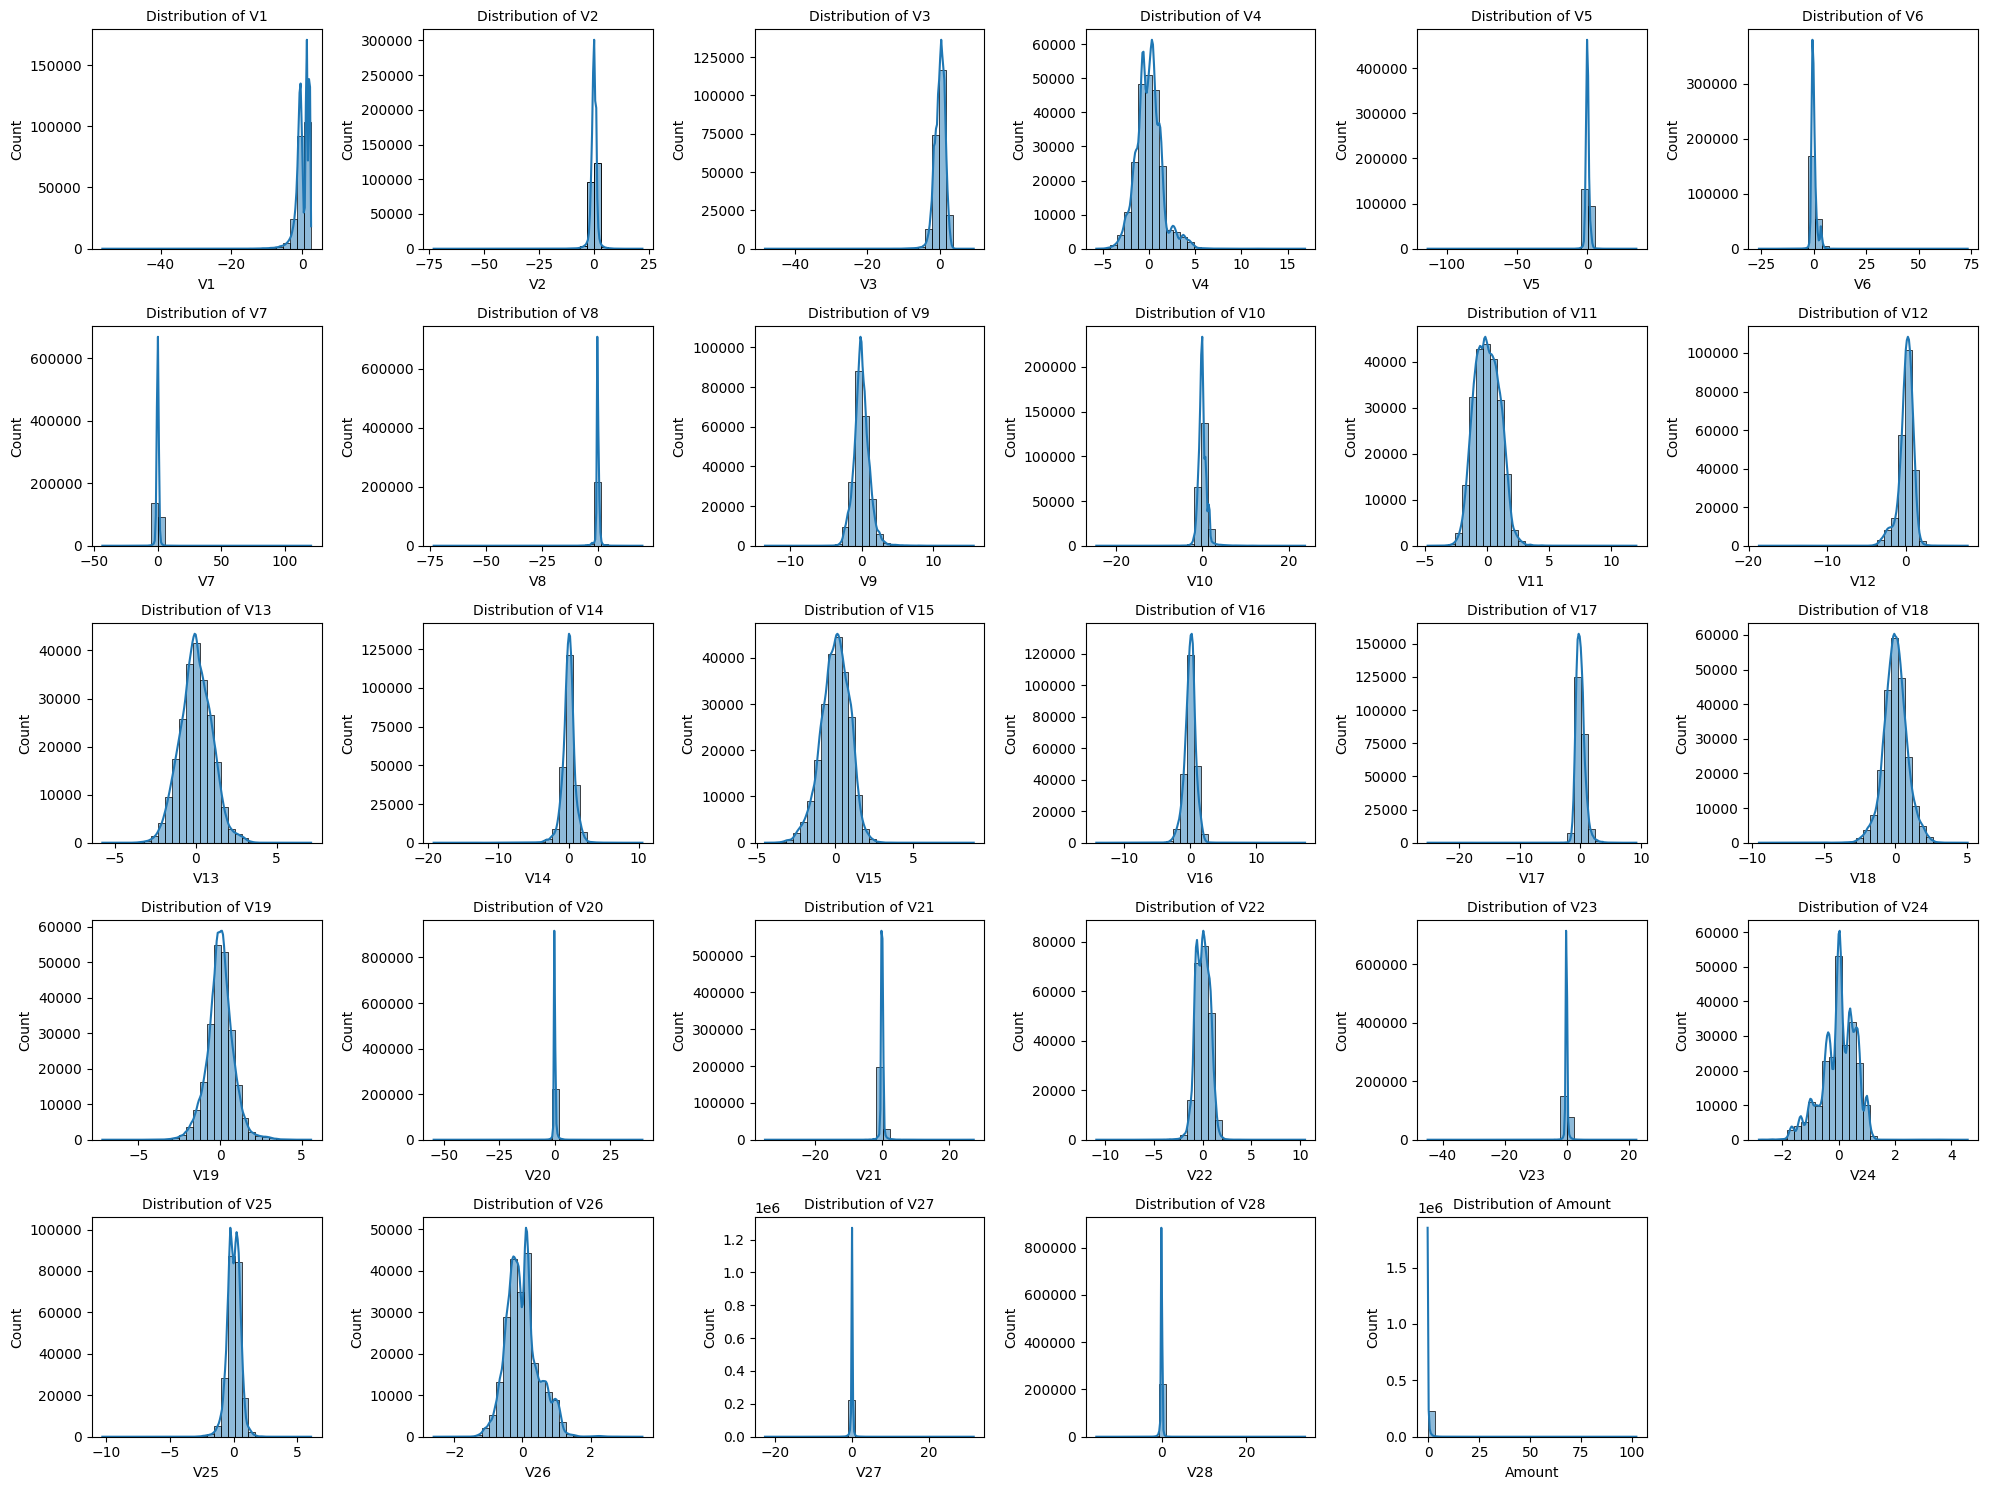

In [27]:
# List of feature columns
features = X_train.columns

# Set figure size
plt.figure(figsize=(20, 15))

# Plot each feature's distribution
for i, col in enumerate(features, 1):
    plt.subplot(5, 6, i)  # 5 rows, 6 columns layout
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.tight_layout()

plt.show()

#####Observation

Many features appear to be highly skewed based on their distributions. To confirm this, the skewness of each feature using the skew() function should be calculated. If the skewness lies outside the range of -1 to 1, a power transformation will be applied (e.g., Yeo-Johnson) to make the distributions more symmetric and suitable for modeling.

#### Checking and Displaying Skewness of Features

In [28]:
# Check skewness of the features in X_train
var = X_train.columns
skew_list = []

# Calculate skewness for each feature
for i in var:
    skew_list.append(X_train[i].skew())

# Create a DataFrame to display features and their skewness
tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)

# Set the "Features" column as the index for better readability
tmp.set_index("Features", inplace=True)

# Transpose the DataFrame to display the skewness for all features in a row
tmp.T


Features        V1        V2        V3        V4        V5        V6  \
Skewness -3.306334 -4.779484 -2.247962  0.687574 -2.786851  1.937381   

Features        V7        V8        V9       V10       V11       V12  \
Skewness  3.152665 -8.639485  0.541869  1.132688  0.354102 -2.286654   

Features       V13       V14       V15       V16       V17       V18  \
Skewness  0.064819 -1.969112 -0.308419 -1.077909 -3.733377 -0.254948   

Features       V19       V20       V21       V22       V23       V24  \
Skewness  0.106133 -1.960492  3.490183 -0.219171 -6.258558 -0.549854   

Features       V25      V26       V27       V28     Amount  
Skewness -0.436292  0.57498 -0.890209  9.978409  18.193943

 filters and identifies the features in the dataset that have skewness values outside the range of -1 to +1. These features are considered highly skewed, which means their distributions are not normal (Gaussian).

In [29]:
# Filtering the features which have skewness less than -1 or greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] < -1)].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


#####Observation

**Skewness present** in the above features can be addressed by using the Power Transformer package, which is available in the preprocessing library provided by sklearn. It helps to transform the data and make its distribution more Gaussian (normal).

####**Power Transformation**

In [30]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

#### **Result plotting**

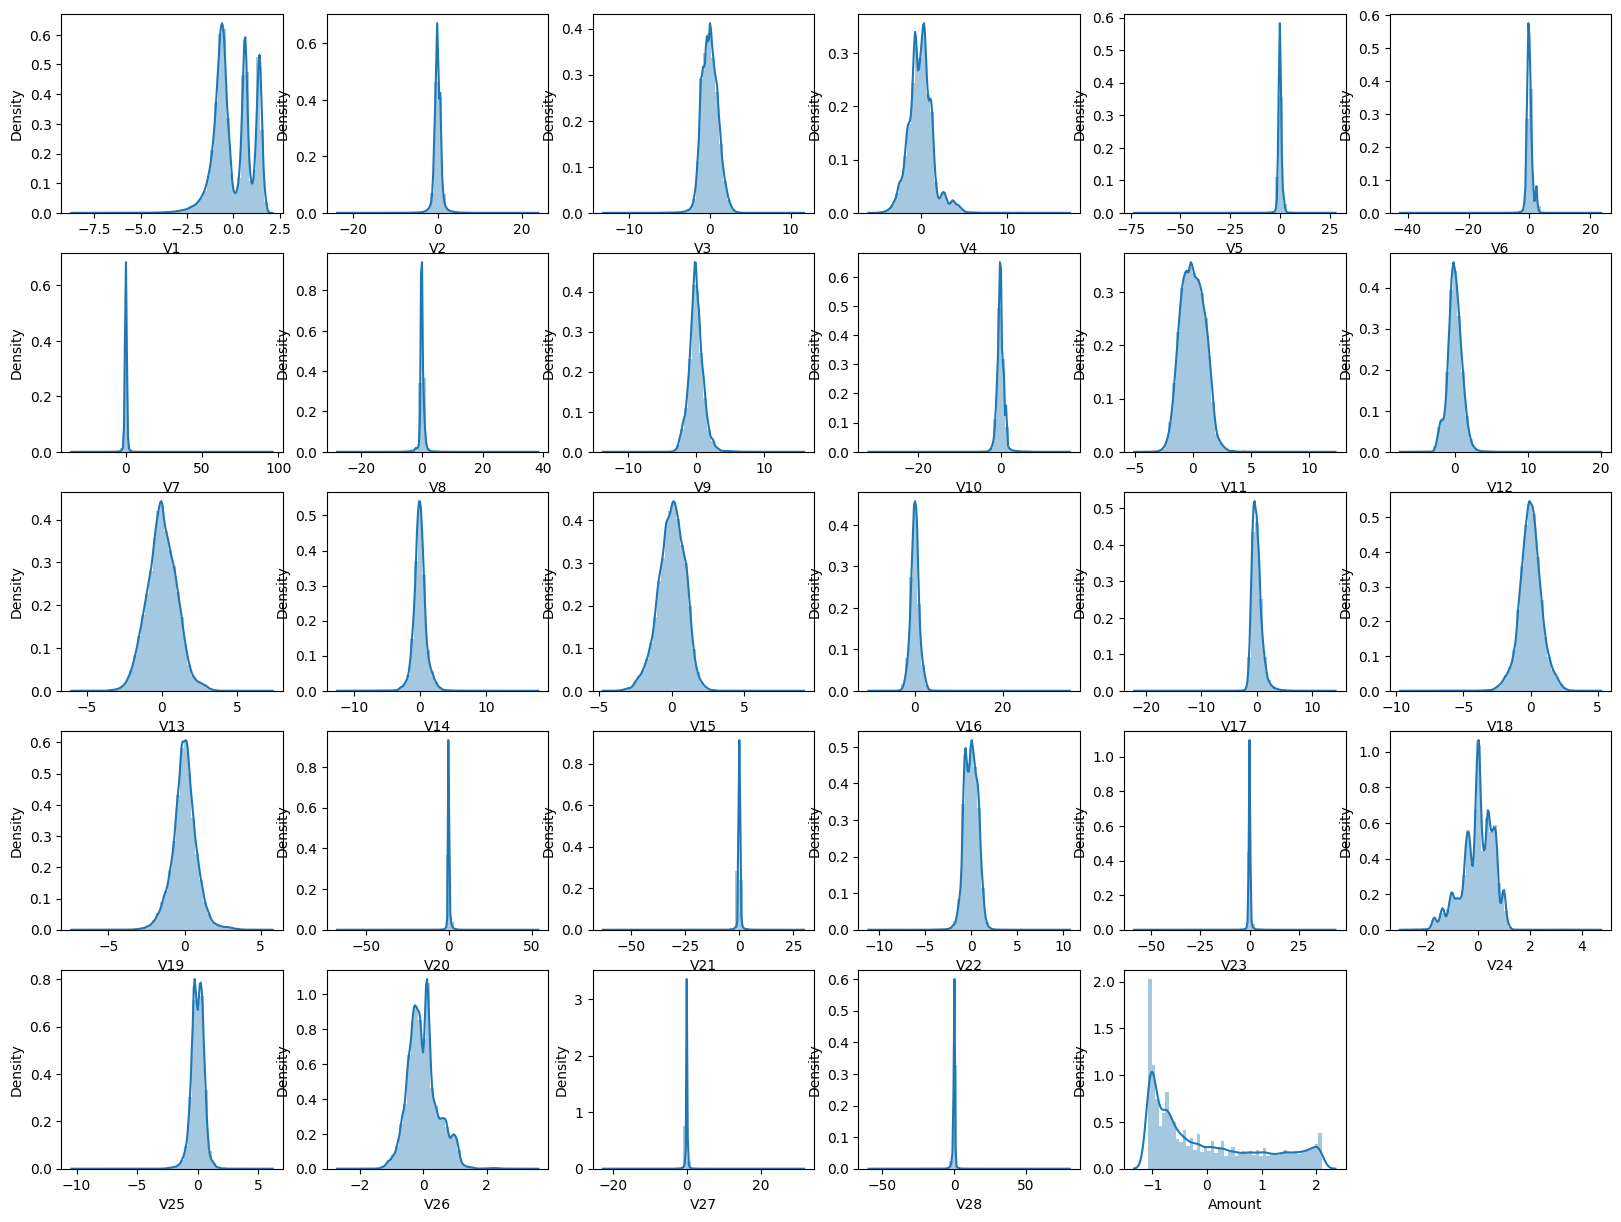

In [31]:
# plot the histogram of a variable from the dataset again to see the result
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building with imbalanced data


creating models using the following algorithms and then compare their performance to determine which model performs best. We are excluding SVM, RandomForest, and KNN from the model development process due to their computational demands. Specifically, SVM and KNN require significant processing power, as KNN calculates the distance between each data point to determine the closest neighbor. In cases of large datasets, this process becomes highly resource-intensive. As we do not currently have access to the required computational resources, we will not use these models.

The algorithms that will be used:

* Logistic Regression

* Decision Tree

* XGBoost



> **Metric Selection for Imbalanced Data**
To evaluate the models, we will use the **ROC-AUC** score as the performance metric. Since fraud incidents are rare in the dataset, and the data is highly imbalanced, accuracy is not an appropriate metric for assessment. The ROC-AUC score provides a more balanced evaluation in cases of class imbalance, as it considers both false positives and false negatives, giving a better understanding of model performance.



imbalance confirmation, approximatly
about 99% of the data is non-fraudulent and only about 1% is fraudulent

In [32]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

### 1. Logistic Regression

#### Hyperparameter Tuning and Cross-Validation for Logistic Regression

In [33]:
# Logistic Regression parameters for K-fold cross-validation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Perform cross-validation with GridSearchCV
model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=params,
                        scoring='roc_auc',
                        cv=folds,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Perform hyperparameter tuning
model_cv.fit(X_train, y_train)

# Print the best ROC AUC score from cross-validation
print('Best ROC AUC score: ', model_cv.best_score_)

# Print the optimal hyperparameters found during the search
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9827072995871499
Best hyperparameters:  {'C': 0.01}


##### Cross validation benefit on our credit card dataset

1. **Avoid Overfitting**
Overfitting occurs when a model performs very well on the training data but poorly on unseen (test) data. By splitting the data into multiple parts (folds) and training/testing the model on different subsets, cross-validation helps in assessing the model's ability to generalize to new data, reducing the likelihood of overfitting.

2. **Better Performance Estimation**
Instead of relying on a single train/test split, cross-validation uses multiple different splits. This provides a more robust estimate of how the model will perform on unseen data, as it takes into account the variability in the dataset.

3. **More Efficient Use of Data**
In traditional train/test splits, a portion of the data is reserved for testing. In cross-validation, each data point is used for both training and testing (just not at the same time). This allows the model to make the best use of available data, especially in situations where data is limited.

4. **Hyperparameter Tuning**
When performing grid search or randomized search to find the best hyperparameters for a model, cross-validation ensures that the evaluation of the hyperparameters is done in a more reliable and generalized way, not just on a single train/test split. This way, we can find hyperparameters that will give us a robust model, rather than one that is tuned for only a particular subset of the data.

In [34]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.318314      0.017892         0.017327        0.000782     0.01   
1       0.294659      0.021864         0.016283        0.000893     0.10   
2       0.305389      0.029129         0.017171        0.001564     1.00   
3       0.312216      0.020059         0.016983        0.001612    10.00   
4       0.298683      0.030515         0.016207        0.001091   100.00   
5       0.312995      0.012857         0.016652        0.000732  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989630           0.970156           0.991249   
1   {'C': 0.1}           0.985819           0.969908           0.989964   
2     {'C': 1}           0.985229           0.970501           0.989199   
3    {'C': 10}           0.985175           0.970467           0.989145   
4   {'C': 100}           0.985170           0.970462           0.989139   
5  {'C': 1000}           0.985169           0.970462           0.989139   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.976996           0.985505         0.982707        0.007986   
1           0.974331           0.979867         0.979978        0.007309   
2           0.973954           0.979272         0.979631        0.006908   
3           0.973899           0.979215         0.979580        0.006903   
4           0.973893           0.979210         0.979575        0.006903   
5           0.973893           0.979210         0.979575        0.006903   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.983844            0.988151   
1                2            0.982879            0.987539   
2                3            0.982656            0.986593   
3                4            0.982635            0.986535   
4                5            0.982633            0.986530   
5                6            0.982633            0.986530   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.983884            0.986411            0.983843   
1            0.982650            0.984039            0.982833   
2            0.982006            0.984131            0.982396   
3            0.981952            0.984121            0.982348   
4            0.981946            0.984120            0.982342   
5            0.981946            0.984120            0.982341   

   mean_train_score  std_train_score  
0          0.985227         0.001766  
1          0.983988         0.001842  
2          0.983556         0.001680  
3          0.983518         0.001677  
4          0.983514         0.001678  
5          0.983514         0.001678

##### Plot of C Parameter vs Train and Validation Scores

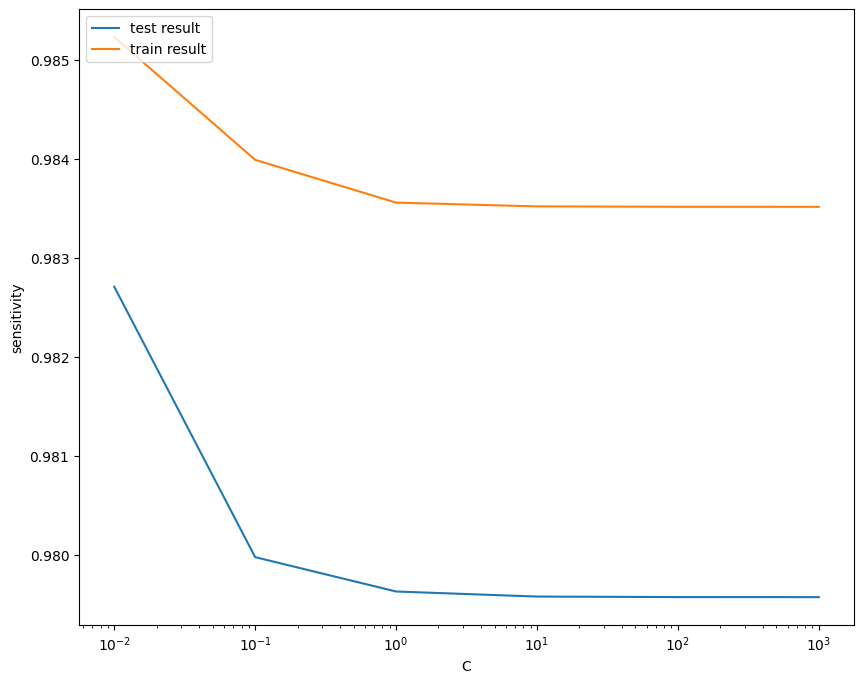

In [35]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [36]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Evaluation on the train set

In [37]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [38]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [39]:
display_scores(y_train, y_train_pred)

F1 Score: 74.29%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.96      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [40]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [41]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

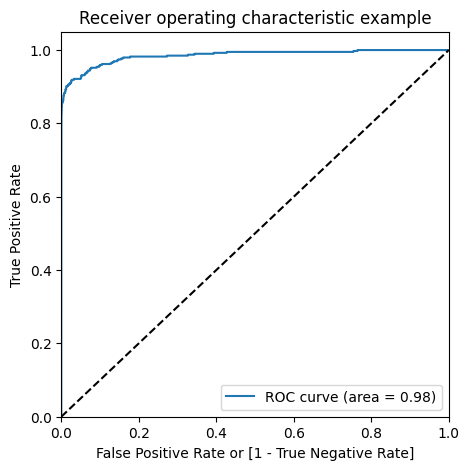

In [42]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating logistic regression Model Performance

In [43]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)

# Displaying evaluation metrics: F1 score, classification report
display_scores(y_test, y_test_pred)

F1 Score: 73.14%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [44]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

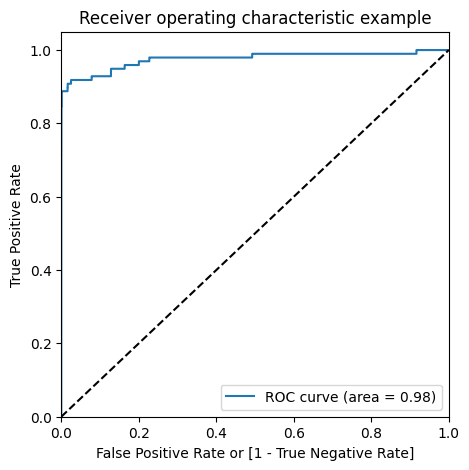

In [45]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see very good ROC on the test data set 0.98.

#### Model Performance Summary

- Train set
    - ROC : 98%
    - F1 Score: 74.29%
    
- Test set
    - ROC : 98%
    - F1 score: 73.14%

### 2. Decision Tree

##### **Pros of Using Decision Trees for Credit Card Fraud Detection**
* Easy to Understand & Interpret: You can visualize how decisions are made, which is great for transparency.

* Handles Both Numerical & Categorical Data: No need to scale data like logistic regression.

* Captures Non-linear Relationships: Which is useful in fraud detection since patterns aren’t always linear.

##### **Hyperparameter Tuning for Decision Tree using Grid Search**

In [46]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': range(5, 15, 5),            # Controls the maximum depth of the tree
    'min_samples_leaf': range(50, 150, 50),  # Minimum samples required to be at a leaf node
    'min_samples_split': range(50, 150, 50)  # Minimum samples required to split an internal node
}

# Instantiate the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV to perform hyperparameter tuning with ROC-AUC as the scoring metric
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [47]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.925546      0.125818         0.022069        0.000950   
1       4.250587      0.418090         0.019402        0.001301   
2       3.983545      0.027482         0.017703        0.000758   
3       4.024613      0.026886         0.017017        0.000829   
4       7.767490      0.044741         0.019994        0.001035   
5       7.808165      0.027854         0.018041        0.000662   
6       7.812636      0.044059         0.028516        0.013501   
7       7.872001      0.049164         0.019169        0.000357   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.901295   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.901295   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.928512   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.928512   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.902159   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.902159   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.899768   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.899768   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.934344           0.936853         0.924164        0.016203   
1           0.934344           0.936853         0.924164        0.016203   
2           0.934740           0.944521         0.935924        0.006589   
3           0.934740           0.944521         0.935924        0.006589   
4           0.939732           0.927949         0.923280        0.015690   
5           0.939732           0.927949         0.923280        0.015690   
6           0.933452           0.934409         0.922543        0.016109   
7           0.933452           0.934409         0.922543        0.016109   

   rank_test_score  
0                3  
1                3  
2                1  
3                1  
4                5  
5                5  
6                7  
7                7

In [48]:
# Printing the optimal score
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9359244925074665


In [49]:
# Printing the hyperparameters
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)


####Training Decision Tree Model with Optimal **Hyperparameters**

In [50]:
# Instantiate the Decision Tree model with the best parameters from GridSearchCV
dt_imb_model = DecisionTreeClassifier(
    criterion="gini",             # Splitting criterion
    random_state=100,             # Ensures reproducibility
    max_depth=10,                 # Maximum depth of the tree
    min_samples_leaf=100,        # Minimum samples required at a leaf node
    min_samples_split=100        # Minimum samples required to split an internal node
)

# Fit the model on the training data
dt_imb_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Evaluating Decision Tree Model on Training Data

In [51]:
# Make predictions on the training set
y_train_pred = dt_imb_model.predict(X_train)

# Display evaluation metrics for the training predictions
display_scores(y_train, y_train_pred)


F1 Score: 68.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.56      0.68       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



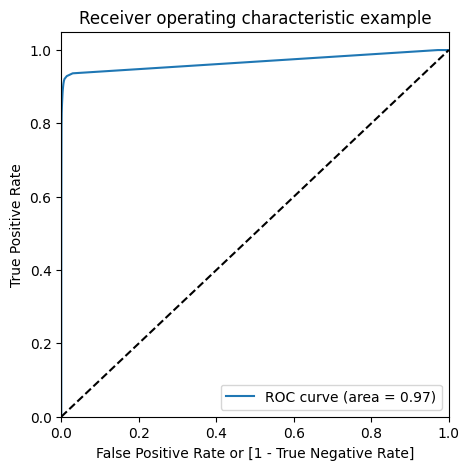

In [52]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating Model Performance

In [53]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 61.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



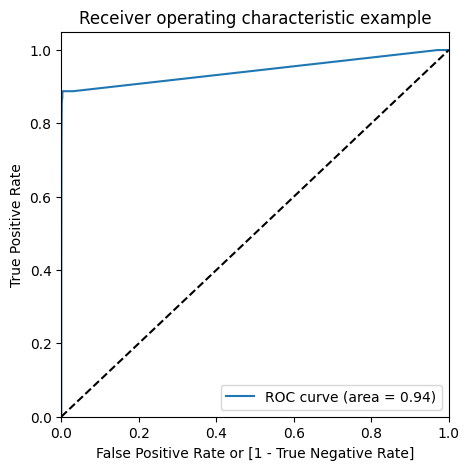

In [54]:
# Get predicted probabilities for the positive class
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:, 1]

# Plot the ROC curve using the custom function
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary

- Train set
    - ROC Score: 97%
    - F1 score : 68.32%
    
- Test set
    - ROC Score: 94%
    - F1 score : 61.73%

noticed higher accuracy than logistic regression

### 3. XGBoost

####**Pros of Using XGBoost for Credit Card Fraud Detection**
* Fast & Efficient: Optimized for speed with parallel processing.

* Handles Imbalanced Data: Supports class weighting (scale_pos_weight).

* Great Accuracy: Ensemble method with strong predictive power.

* Built-in Regularization: Prevents overfitting (L1 & L2).

* Feature Importance: Easily interpret which features matter most.

* Handles Missing Values: No need for imputation.

* Early Stopping: Stops training at optimal point.

In [55]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.925588      0.008022         0.043861        0.000741   
1       0.925565      0.015070         0.045055        0.001734   
2       1.220628      0.257405         0.033835        0.007582   
3       1.679544      0.169748         0.025440        0.001443   
4       1.502484      0.012579         0.027020        0.000673   
5       1.453121      0.057513         0.031034        0.003664   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.976846   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.932607   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.495439   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.500000   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.464688   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.884997   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.959126           0.988005         0.974659        0.011891   
1           0.943573           0.986006         0.954062        0.023027   
2           0.483803           0.852145         0.610462        0.170961   
3           0.500000           0.482281         0.494094        0.008353   
4           0.500000           0.500000         0.488229        0.016646   
5           0.469951           0.746904         0.700617        0.172574   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999796            0.999774   
1                2            0.991887            0.999712   
2                4            0.495342            0.480413   
3                5            0.500000            0.500000   
4                6            0.464717            0.500000   
5                3            0.901605            0.464713   

   split2_train_score  mean_train_score  std_train_score  
0            0.999498          0.999689         0.000136  
1            0.999922          0.997174         0.003739  
2            0.911918          0.629224         0.199987  
3            0.482312          0.494104         0.008338  
4            0.500000          0.488239         0.016632  
5            0.734418          0.700245         0.179990

In [57]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9746586975649584
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [58]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

#### Training XGBoost Model with Optimal Hyperparameters

In [59]:
# Define the best hyperparameters obtained from GridSearchCV
params = {
    'learning_rate': 0.2,
    'max_depth': 2,
    'n_estimators': 200,
    'subsample': 0.9,
    'objective': 'binary:logistic'
}

# Instantiate the XGBoost classifier with the best parameters
xgb_imb_model = XGBClassifier(**params)

# Fit the model on the training data
xgb_imb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

#### Evaluating XGBoost Model on Training Data

In [60]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 88.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.95      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



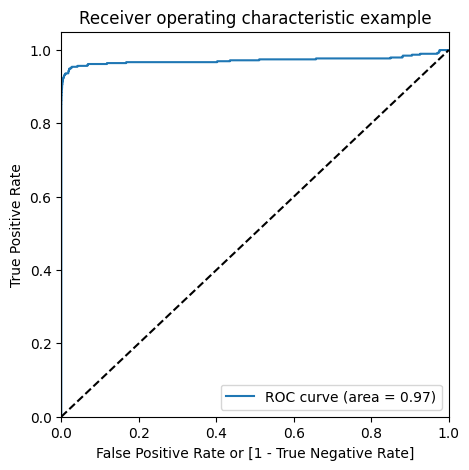

In [61]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluating Model Performance on test data

In [62]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 77.72%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.77      0.78        98

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962



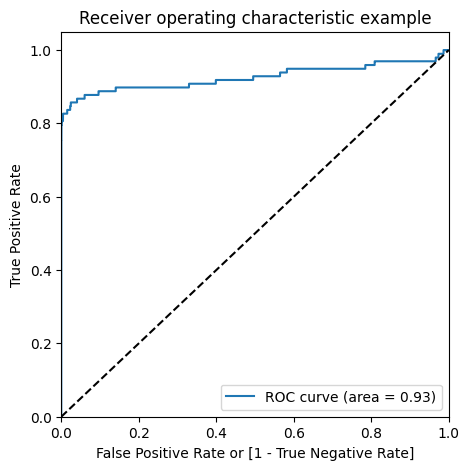

In [63]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score:97%
    - F1 score:88.62%
- Test set
    - ROC score: 93%
    - F1 score: 77.72%

Out of these three models used, the **XGBoost** model performs well on **unbalanced data**. With test data, the ROC-AUC score is **93%** with f1 score **77.72**%

### Print the important features of the best model to understand the dataset
the below code will display the most important features **when the dataset has not been PCA-transformed**. For a PCA-transformed dataset, this **won't be very informative**, as the features would now represent principal components rather than the original features. Therefore, this analysis is valuable only if the dataset hasn't undergone PCA transformation, as it helps in understanding the relative contribution of each feature to the model.

Top var = 14
2nd Top var = 10
3rd Top var = 17


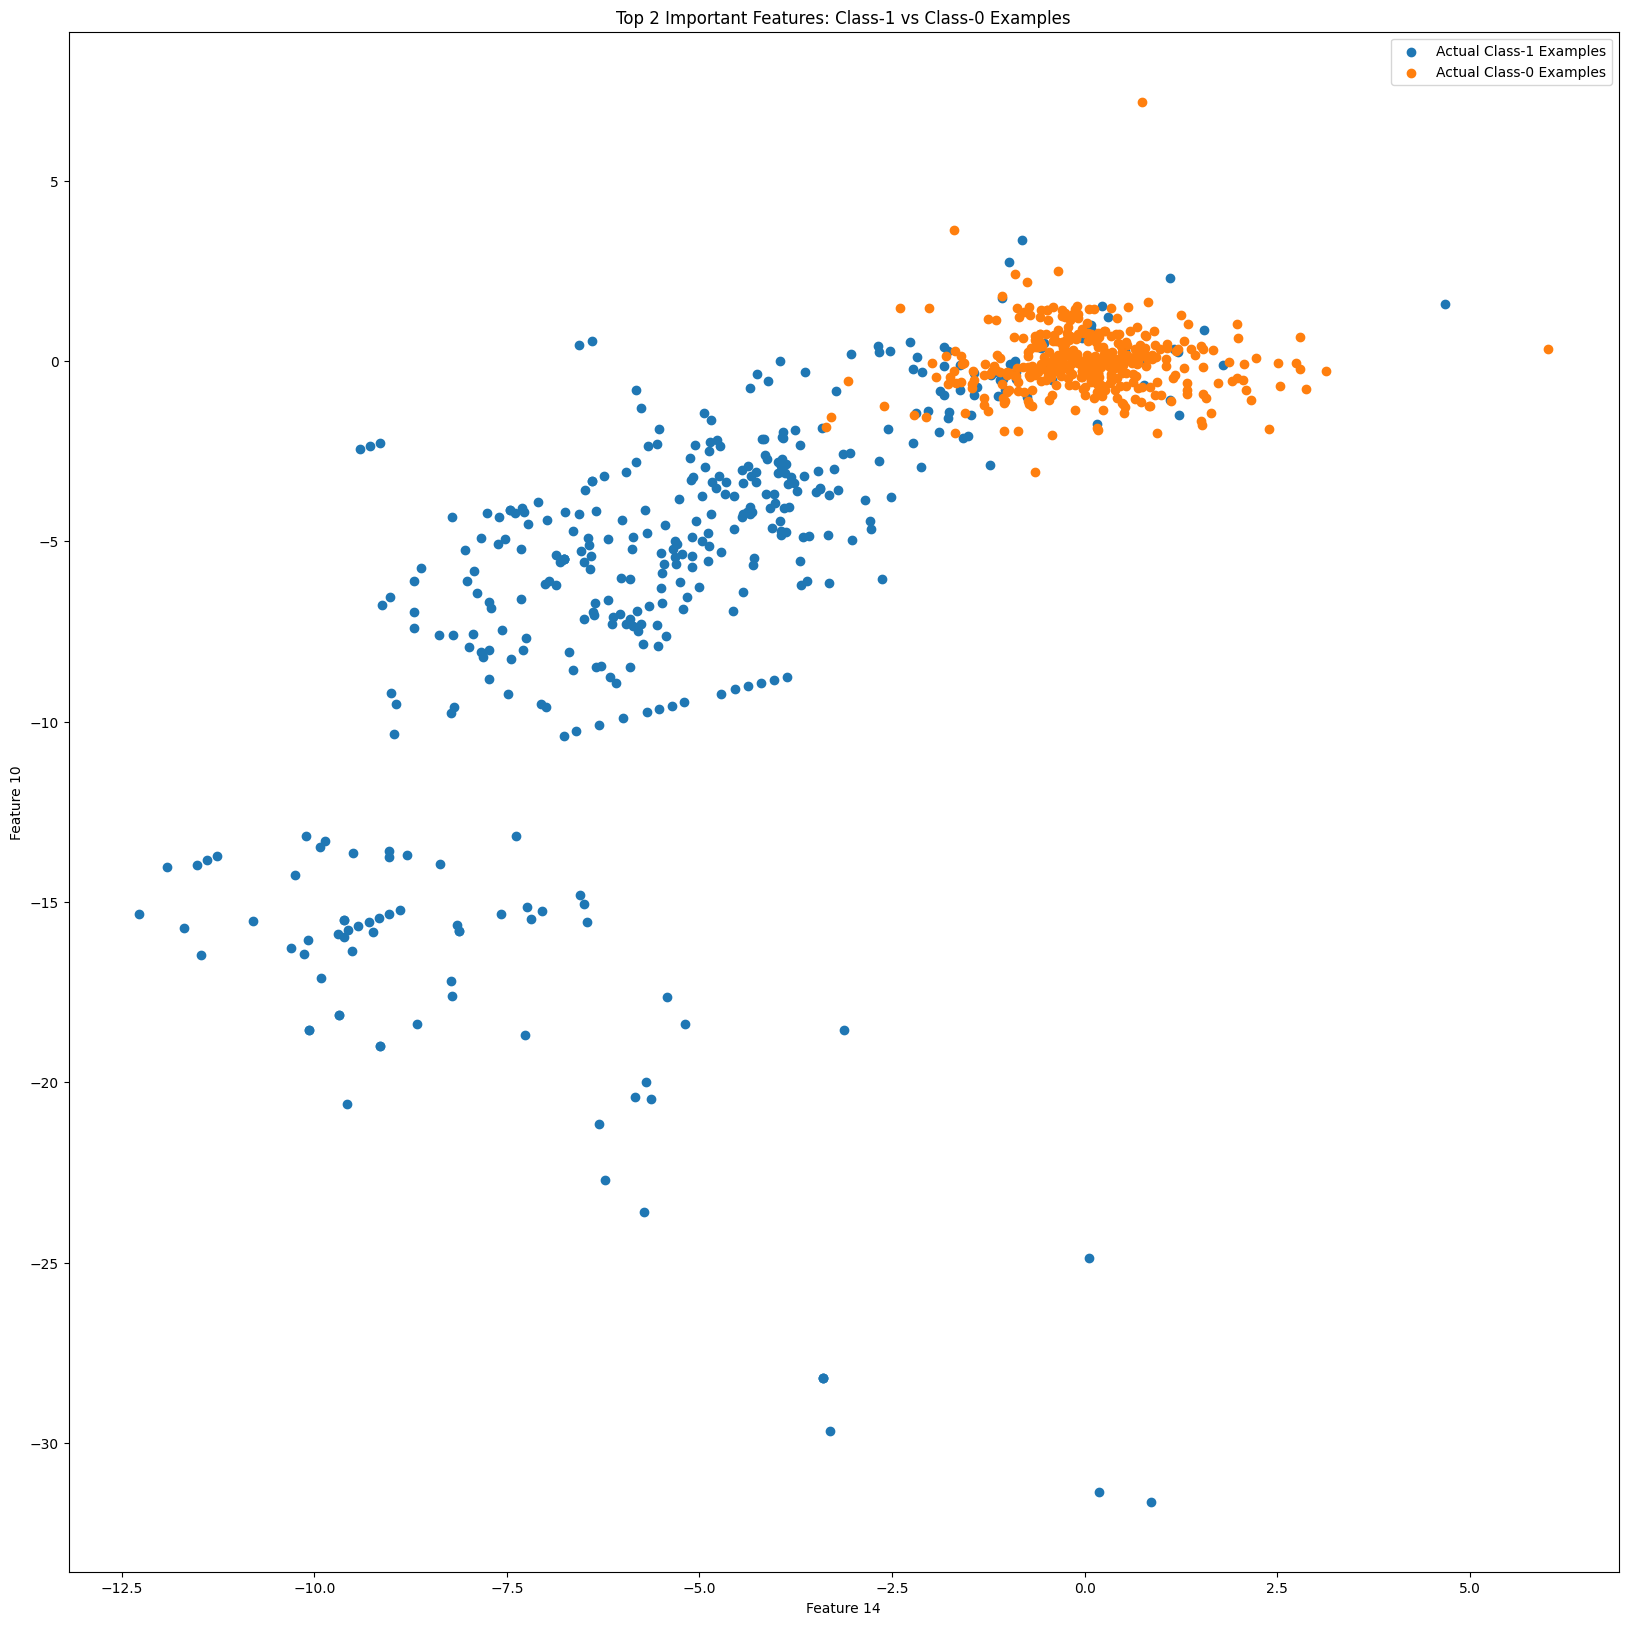

In [64]:
# List to store feature importances
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)

# Print the top 3 important variables based on feature importance
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1]) + 1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2]) + 1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3]) + 1)

# Identifying the index of the top 2 most important variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

# Get the Class-1 and Class-0 examples
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Shuffle the Class-0 examples for visualization
np.random.shuffle(X_train_0)

# Plotting the scatter plot of top 2 important features
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.title('Top 2 Important Features: Class-1 vs Class-0 Examples')
plt.xlabel(f'Feature {top_var_index + 1}')
plt.ylabel(f'Feature {second_top_var_index + 1}')
plt.show()


#### Print the FPR, TPR & Select the Best Threshold from the ROC Curve

In [65]:
# Calculate AUC score for the train set
print('Train AUC =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))

# Compute FPR (False Positive Rate) and TPR (True Positive Rate) for various thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)

# Find the optimal threshold by maximizing the difference between TPR and FPR
threshold = thresholds[np.argmax(tpr - fpr)]

# Print the best threshold
print("Best Threshold =", threshold)


Train AUC = 0.9719540865241751
Best Threshold = 0.001280651


The selected threshold value is 0.001280651 is the best choice for the imbalanced data

At this low threshold:

The TPR is high, meaning the model successfully captures the majority of fraudulent transactions (positive class).

However, this also results in a higher FPR, meaning more legitimate transactions ( non-fraud ) are incorrectly flagged as fraud.

**Explanation:**
**TPR** (True Positive Rate): Represents the proportion of actual positive instances correctly identified by the model. A higher TPR means fewer false negatives.

FPR (False Positive Rate): Represents the proportion of actual negative instances incorrectly identified as positive. A lower FPR means fewer false positives.

> **ROC Curve**: A graphical representation of the trade-off between TPR and FPR at different threshold levels. The area under the curve (**AUC**) reflects the model's ability to distinguish between the two classes. A higher AUC score indicates better model performance.



**The imbalance is the main reason why the best threshold is so low.**
the model is Good for True Positives only
At 0.00157, catching 81% of actual fraud cases (recall).

## Model building with Balancing Classes
Model Building with Balancing Classes
In this step,i will use various oversampling techniques to address the data imbalance and improve the model's performance. The techniques that will be applied are:

* **Random Oversampling**: A method that randomly duplicates instances from the minority class to balance the class distribution.

* **SMOTE** (Synthetic Minority Oversampling Technique): A technique that creates synthetic samples for the minority class by interpolating between existing instances.

* **ADASYN** (Adaptive Synthetic Sampling): An enhanced version of SMOTE, which focuses on generating more synthetic samples for the minority class near the decision boundary.

the plan is to evaluate the performance of the model after applying each of these techniques and choose the one that yields the best results in terms of model accuracy and **AUC** scores.

### Random Oversampling for Class Balancing

In [66]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.4 MB/s eta 0:00:00


In [67]:
from imblearn.over_sampling import RandomOverSampler

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transformation
X_over, y_over = oversample.fit_resample(X_train, y_train)

from collections import Counter

# Class distribution before oversampling
print('Before sampling class distribution:-', Counter(y_train))

# Class distribution after oversampling
print('New class distribution:-', Counter(y_over))


Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regression Model with Random Oversampling

####Hyperparameter Tuning Using K-Fold Cross-Validation

In [68]:
 #find the optimal C hyperparameter for the Logistic Regression model,
 #based on the highest ROC-AUC score obtained during cross-validation
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specify score as ROC-AUC
model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=params,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_over, y_over)

# Print the best ROC AUC score and hyperparameters
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9883023255018821
Best hyperparameters:  {'C': 100}


In [69]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       6.804918      0.195076         0.250099        0.048401     0.01   
1       6.725788      0.134166         0.194832        0.002580     0.10   
2       6.628088      0.095982         0.190501        0.001748     1.00   
3       6.706478      0.134862         0.189377        0.002007    10.00   
4       6.667591      0.074635         0.189718        0.001206   100.00   
5       6.687232      0.118546         0.190644        0.000666  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988191           0.988178           0.988142   
1   {'C': 0.1}           0.988292           0.988302           0.988241   
2     {'C': 1}           0.988301           0.988311           0.988256   
3    {'C': 10}           0.988302           0.988313           0.988258   
4   {'C': 100}           0.988303           0.988313           0.988258   
5  {'C': 1000}           0.988303           0.988313           0.988258   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.987771           0.988610         0.988178        0.000266   
1           0.987893           0.988710         0.988287        0.000260   
2           0.987912           0.988723         0.988301        0.000257   
3           0.987913           0.988725         0.988302        0.000258   
4           0.987913           0.988725         0.988302        0.000258   
5           0.987913           0.988725         0.988302        0.000258   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988186            0.988164   
1                5            0.988301            0.988274   
2                4            0.988313            0.988286   
3                3            0.988315            0.988287   
4                1            0.988315            0.988287   
5                2            0.988315            0.988287   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988198            0.988320            0.988084   
1            0.988313            0.988428            0.988196   
2            0.988326            0.988445            0.988209   
3            0.988327            0.988446            0.988210   
4            0.988327            0.988446            0.988210   
5            0.988327            0.988446            0.988210   

   mean_train_score  std_train_score  
0          0.988190         0.000076  
1          0.988302         0.000075  
2          0.988316         0.000076  
3          0.988317         0.000076  
4          0.988317         0.000076  
5          0.988317         0.000076

####Plotting C vs Train and Validation Scores

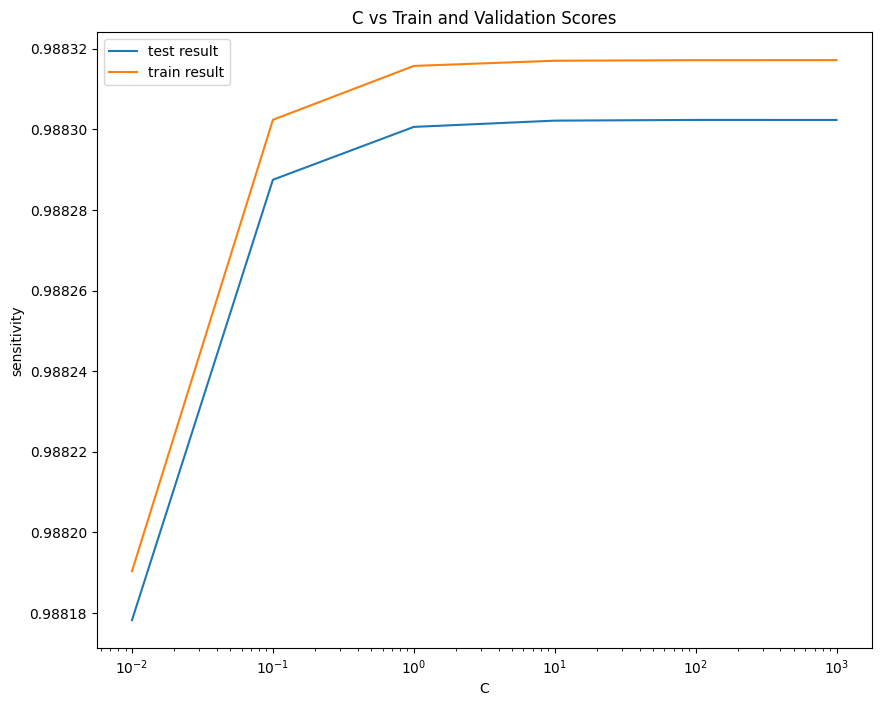

In [70]:
# Plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.title('C vs Train and Validation Scores')
plt.show()


####Model Instantiation and Training with Oversampled Data

In [71]:
model_cv.best_params_

{'C': 100}

In [72]:
# Instantiating the Logistic Regression model with a fixed hyperparameter C=1000
logreg_over = LogisticRegression(C=1000)

# Fitting the model on the oversampled training data (X_over, y_over)
logreg_over_model = logreg_over.fit(X_over, y_over)


#### Evaluating the model on Training data

In [73]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [74]:
# display scores
display_scores(y_over, y_train_pred)

F1 Score: 95.0%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



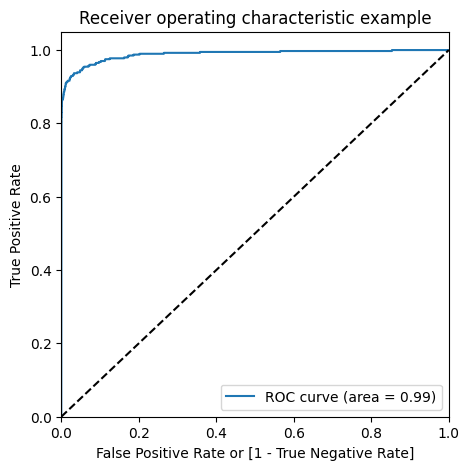

In [75]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating model performance on test data

In [76]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.28%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



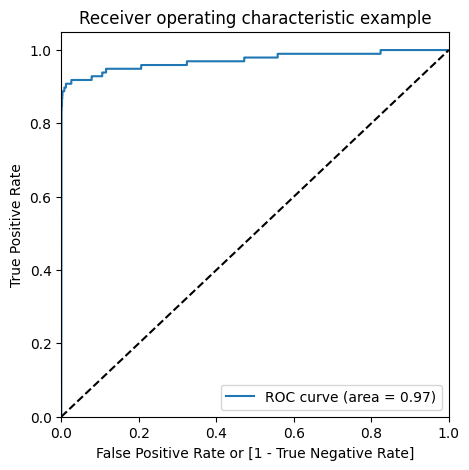

In [77]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 99%
    - F1 score: 95%
- Test set
    - ROC score : 97%
    - F1 score: 10.28%

### 2. Decision Tree with Random Oversampling

In [78]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the decision tree classifier
dtree = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_over, y_over)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [79]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9993773279849769


In [80]:
# Printing the hyperparameters
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree training with optimal hyperparameters

In [81]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Model evaluation on Training data

In [82]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.41%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



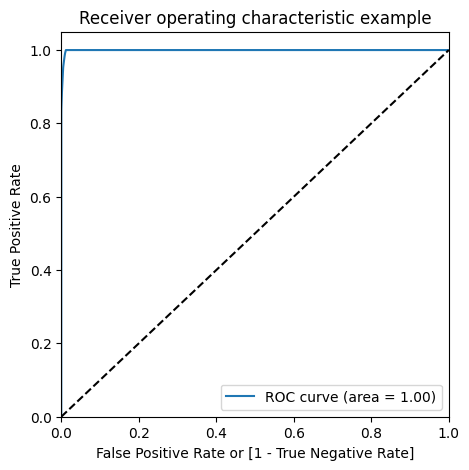

In [83]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating model performance - Predictions on the test set

In [84]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 18.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.84      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



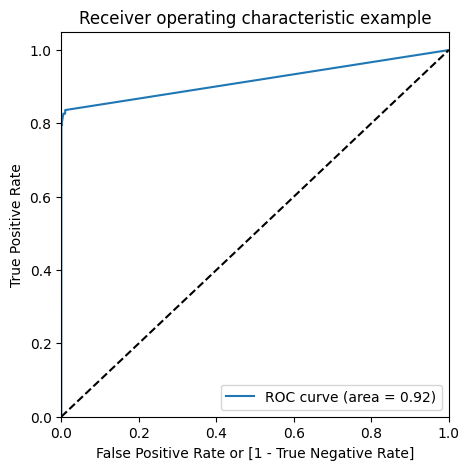

In [85]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.41%
- Test set
    - ROC score : 92%
    - F1 score: 18.3%

### 3. XGBoost with Random Oversampling

#### **Hyperparameter** Tuning for XGBoost using GridSearchCV

In [86]:
# Step 1: Creating a KFold object
folds = 3

# Step 2: Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}

# Step 3: Instantiate the XGBoost model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# Step 4: Set up GridSearchCV for tuning
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Step 5: Fit the model on the oversampled training data
model_cv.fit(X_over, y_over)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [87]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.733699      0.011061         0.080658        0.006262   
1       1.709915      0.006285         0.082511        0.005378   
2       1.761591      0.150157         0.082310        0.004279   
3       1.737993      0.014654         0.077880        0.001684   
4       1.851579      0.083692         0.079756        0.001481   
5       1.685590      0.025502         0.077434        0.000821   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999907   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999897   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999889   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999985   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999999   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999999   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999844           0.999894         0.999881        0.000027   
1           0.999831           0.999889         0.999872        0.000029   
2           0.999826           0.999892         0.999869        0.000030   
3           0.999953           0.999987         0.999975        0.000016   
4           0.999965           0.999992         0.999985        0.000015   
5           0.999953           0.999982         0.999978        0.000019   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999888            0.999906   
1                5            0.999881            0.999906   
2                6            0.999872            0.999898   
3                3            0.999997            0.999999   
4                1            0.999999            0.999998   
5                2            0.999997            0.999998   

   split2_train_score  mean_train_score  std_train_score  
0            0.999885          0.999893     9.513165e-06  
1            0.999884          0.999890     1.090265e-05  
2            0.999878          0.999883     1.115202e-05  
3            0.999999          0.999998     1.214655e-06  
4            0.999997          0.999998     7.900967e-07  
5            1.000000          0.999999     1.096040e-06

In [88]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9999851929750113


In [89]:
# Printing the hyperparameters
print(model_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


#### Fitting the XGBoost Model with Chosen Hyperparameters

In [90]:
# Chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators': 200,
          'subsample': 0.9,
          'objective': 'binary:logistic'}

# Fit model on oversampled training data
xgb_over_model = XGBClassifier(**params)
xgb_over_model.fit(X_over, y_over)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

#### Model Evaluation on training data

In [91]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 99.99%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



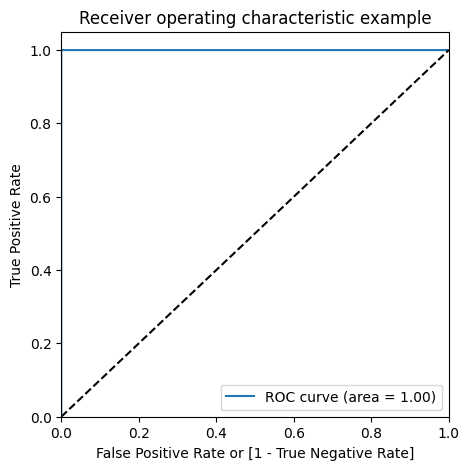

In [92]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluate Model Performance on the test set

In [93]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 76.15%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.85      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



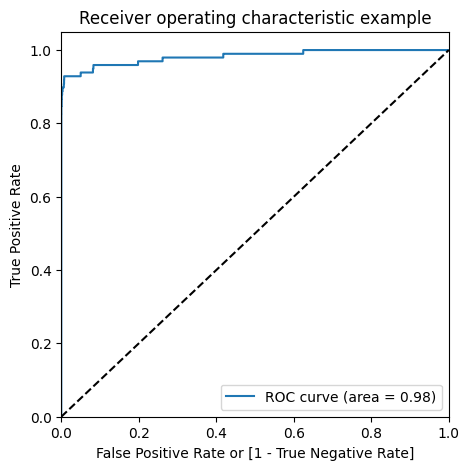

In [94]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.99%
- Test set
    - ROC score : 98%
    - F1 score: 76.15%

## SMOTE (Synthetic Minority Oversampling Technique)

### class distribution after applying SMOTE

SMOTE OverSampling and Visualization:

The below code demonstrates the application of the SMOTE (Synthetic Minority Over-sampling Technique) method to handle class imbalance in the training dataset. SMOTE generates artificial samples for the minority class by interpolating between existing samples. The following steps are performed:

**Resampling the Data**: The SMOTE technique is applied to the training data (X_train, y_train) to create a balanced dataset, producing synthetic samples for the minority class.

**Extracting Artificial Minority Sample**s: The newly created synthetic minority samples are separated from the original dataset to visualize their distribution.

**Visualization**: The results are visualized in three subplots:

The first subplot shows the actual Class-1 examples.

The second subplot overlays the artificial Class-1 samples generated by SMOTE.

The third subplot shows the comparison between the actual Class-1 and Class-0 examples, helping to visualize how SMOTE augments the minority class with new data points.

By using this technique, the dataset becomes more balanced, allowing models to better learn the decision boundaries and improve classification performance.

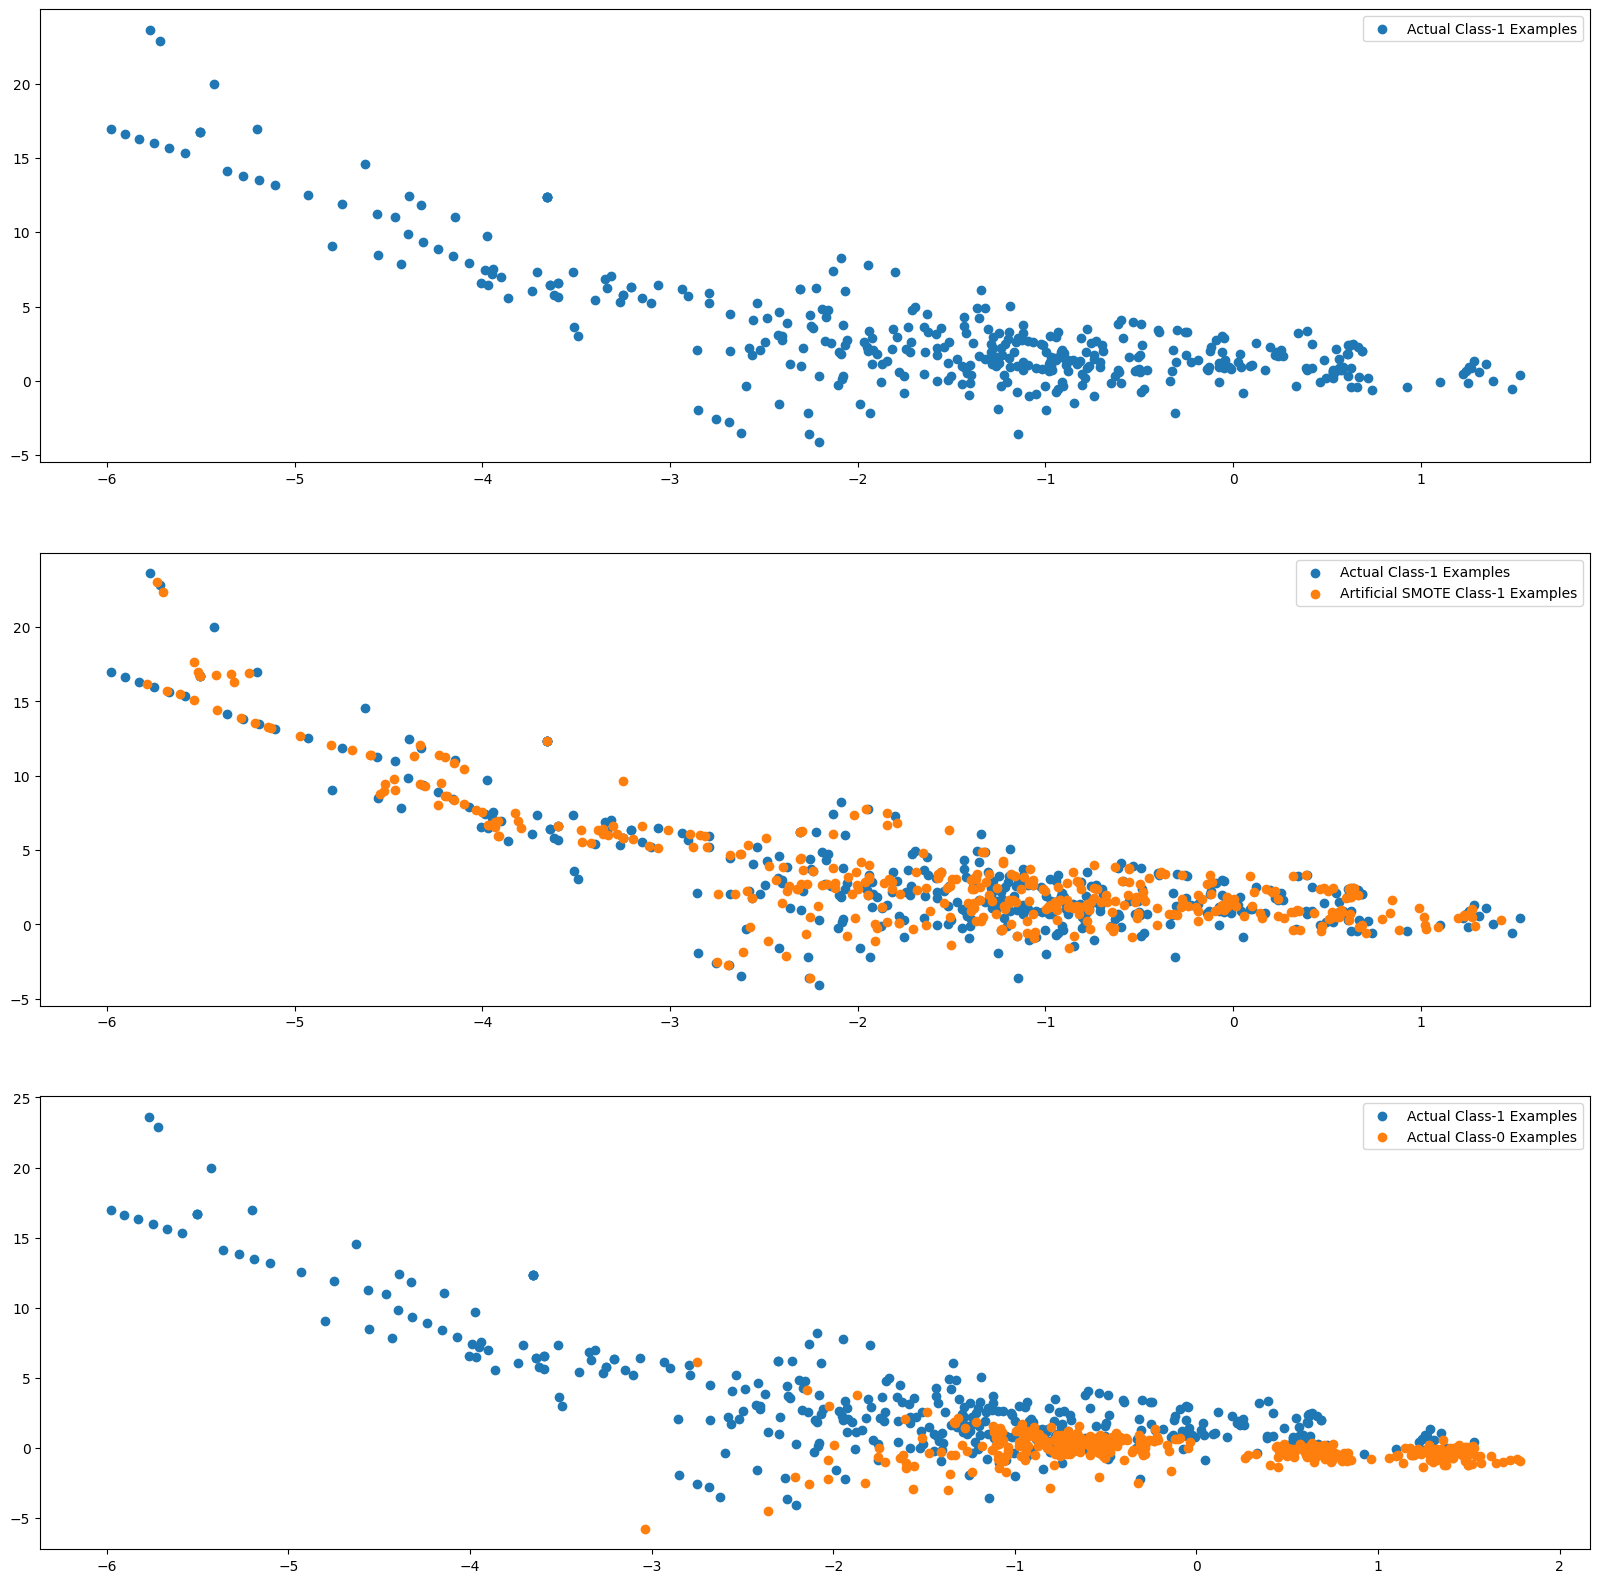

In [95]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Applying SMOTE to balance the dataset
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Extracting artificial minority samples from the oversampled dataset
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

# Separating actual class examples
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Setting up the plot
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

# Plotting actual Class-1 examples
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# Plotting actual Class-1 examples and artificial SMOTE Class-1 examples
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

# Plotting actual Class-1 and Class-0 examples for comparison
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()


### 1. Logistic Regression on balanced data with SMOTE

In [96]:

# Step 1: Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Step 2: Define the hyperparameter grid
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Step 3: Specify scoring method as ROC-AUC for model evaluation
model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=params,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Step 4: Fit the model using oversampled data (X_train_smote, y_train_smote)
model_cv.fit(X_train_smote, y_train_smote)

# Step 5: Print the best ROC-AUC score and corresponding hyperparameters
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.990035442383169
Best hyperparameters:  {'C': 1000}


In [97]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       5.945351      0.216774         0.194235        0.000871     0.01   
1       6.494390      0.319569         0.199735        0.003938     0.10   
2       6.476556      0.249373         0.215193        0.036361     1.00   
3       6.604117      0.288766         0.218038        0.033784    10.00   
4       6.604857      0.287364         0.253437        0.048309   100.00   
5       6.535583      0.282597         0.216079        0.038576  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989941           0.989769           0.990149   
1   {'C': 0.1}           0.990024           0.989884           0.990239   
2     {'C': 1}           0.990035           0.989895           0.990251   
3    {'C': 10}           0.990036           0.989897           0.990252   
4   {'C': 100}           0.990036           0.989897           0.990252   
5  {'C': 1000}           0.990036           0.989897           0.990252   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989669           0.990103         0.989926        0.000186   
1           0.989767           0.990200         0.990023        0.000180   
2           0.989780           0.990210         0.990034        0.000180   
3           0.989781           0.990211         0.990035        0.000180   
4           0.989781           0.990211         0.990035        0.000180   
5           0.989781           0.990211         0.990035        0.000180   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989907            0.989957   
1                5            0.990002            0.990051   
2                4            0.990016            0.990059   
3                3            0.990017            0.990061   
4                2            0.990017            0.990061   
5                1            0.990017            0.990061   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989881            0.990043            0.989909   
1            0.989978            0.990141            0.990004   
2            0.989991            0.990154            0.990013   
3            0.989993            0.990155            0.990014   
4            0.989993            0.990156            0.990015   
5            0.989993            0.990156            0.990015   

   mean_train_score  std_train_score  
0          0.989939         0.000057  
1          0.990035         0.000058  
2          0.990047         0.000058  
3          0.990048         0.000058  
4          0.990048         0.000058  
5          0.990048         0.000058

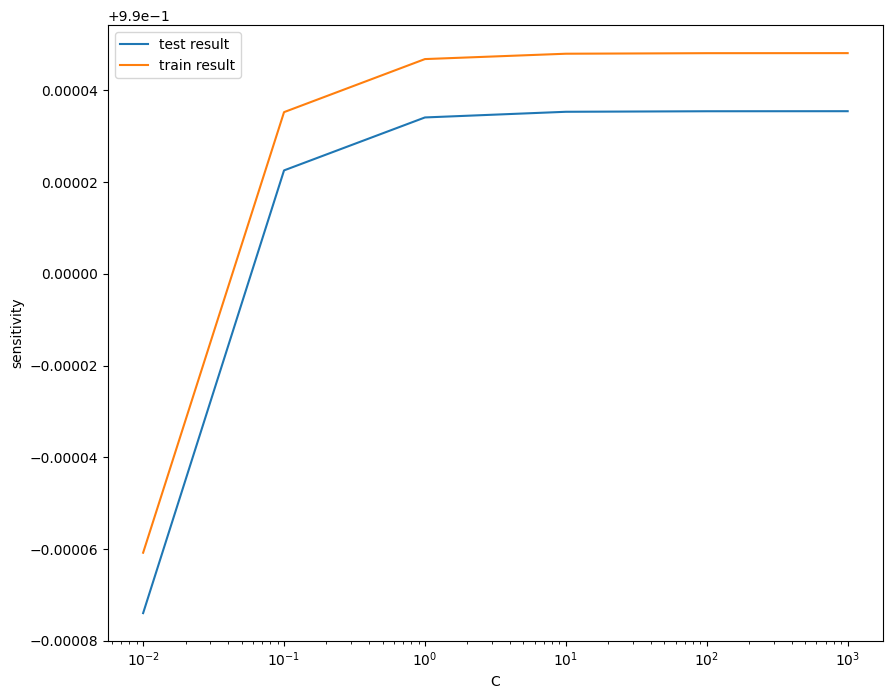

In [98]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [99]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [100]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### Evaluating the model on training data

In [101]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.72%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



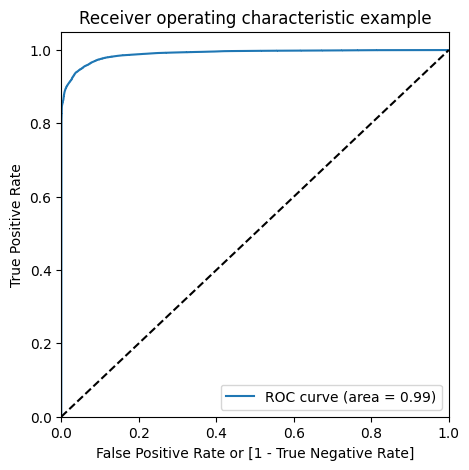

In [102]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating model performance on test data

In [103]:
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.57%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



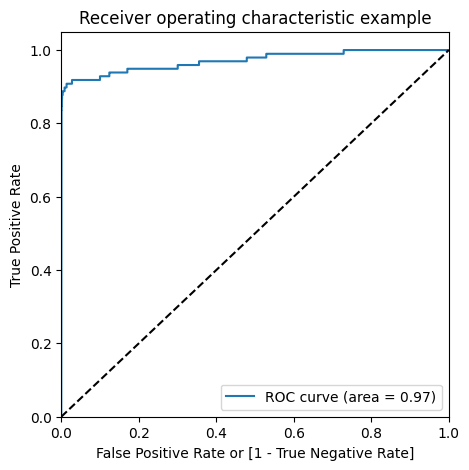

In [104]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

#### Model Performance Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.72%
- Test set
    - ROC score : 97%
    - F1 score: 9.57%

### 2. Decision Tree on balanced data with SMOTE

####Hyperparameter Tuning for Decision Tree Classifier using Grid Search

In [105]:
# Step 1: Define the parameter grid for Decision Tree hyperparameters
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Step 2: Instantiate the Decision Tree classifier
dtree = DecisionTreeClassifier()

# Step 3: Set up GridSearchCV with ROC-AUC scoring and 3-fold cross-validation
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Step 4: Fit the grid search on the oversampled training data
grid_search.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [106]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9979029465760935
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with optimal hyperparameters

In [107]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [108]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Evaluating the model on Training data

In [109]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.82%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



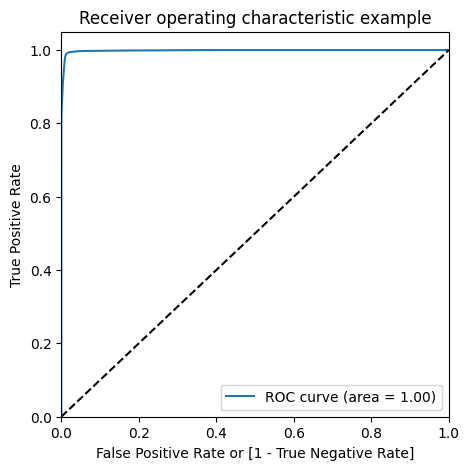

In [110]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating model performance on the test set

In [111]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 16.45%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.86      0.16        98

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.58     56962
weighted avg       1.00      0.99      0.99     56962



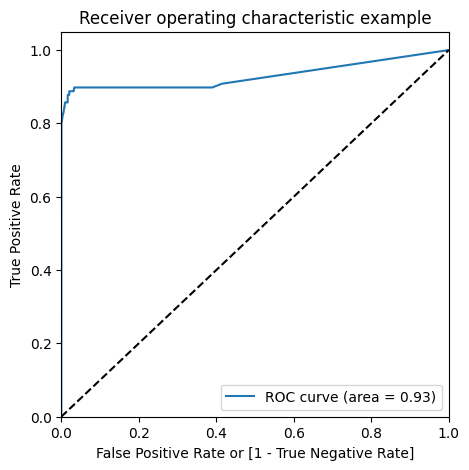

In [112]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### Model Performance Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.82%
- Test set
    - ROC score : 93%
    - F1 score: 16.45%

### 3. XGBoost on balanced data with SMOTE

####Hyperparameter Tuning for XGBoost Model using Grid Search

In [113]:

# Step 1: Create a KFold object with 3 splits
folds = 3

# Step 2: Define the hyperparameter grid for learning rate and subsample
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}

# Step 3: Instantiate the XGBoost model with predefined parameters
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# Step 4: Set up GridSearchCV with ROC-AUC scoring and 3-fold cross-validation
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Step 5: Fit the model on the oversampled training data
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [114]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.728197      0.011823         0.079131        0.001954   
1       1.778678      0.009345         0.080968        0.001165   
2       1.675593      0.006811         0.080037        0.001579   
3       1.918024      0.149794         0.085073        0.011192   
4       2.187463      0.207734         0.087976        0.010604   
5       1.745222      0.029818         0.079621        0.001718   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999571   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999513   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999551   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999951   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999966   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999961   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999552           0.999610         0.999578        0.000024   
1           0.999501           0.999600         0.999538        0.000044   
2           0.999475           0.999600         0.999542        0.000052   
3           0.999896           0.999931         0.999926        0.000023   
4           0.999899           0.999923         0.999929        0.000028   
5           0.999902           0.999940         0.999934        0.000024   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999573            0.999651   
1                6            0.999536            0.999624   
2                5            0.999564            0.999590   
3                3            0.999950            0.999967   
4                2            0.999966            0.999975   
5                1            0.999966            0.999977   

   split2_train_score  mean_train_score  std_train_score  
0            0.999585          0.999603         0.000034  
1            0.999592          0.999584         0.000037  
2            0.999589          0.999581         0.000012  
3            0.999949          0.999955         0.000008  
4            0.999964          0.999968         0.000005  
5            0.999965          0.999969         0.000005

In [115]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999342292631197
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


#### Model with optimal hyperparameter

In [116]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [117]:

# Chosen hyperparameters for XGBoost model
params = {
    'learning_rate': 0.6,
    'max_depth': 2,
    'n_estimators': 200,
    'subsample': 0.6,
    'objective': 'binary:logistic'  # 'binary:logistic' outputs probability for ROC-AUC calculation
}

# Step 1: Instantiate the XGBoost model with the chosen parameters
xgb_smote_model = XGBClassifier(**params)

# Step 2: Fit the model on the oversampled training data
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

#### Evaluating the model on the training data

In [118]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.87%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



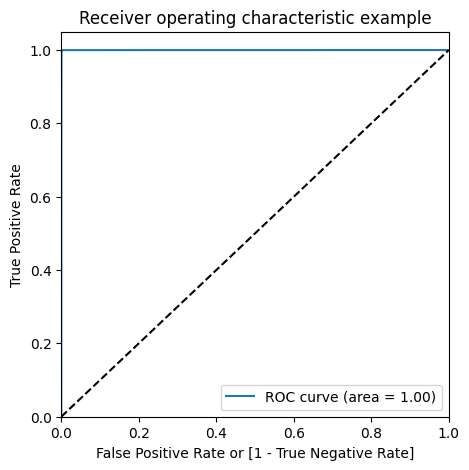

In [119]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model performance on test data

In [120]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 49.13%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.87      0.49        98

    accuracy                           1.00     56962
   macro avg       0.67      0.93      0.74     56962
weighted avg       1.00      1.00      1.00     56962



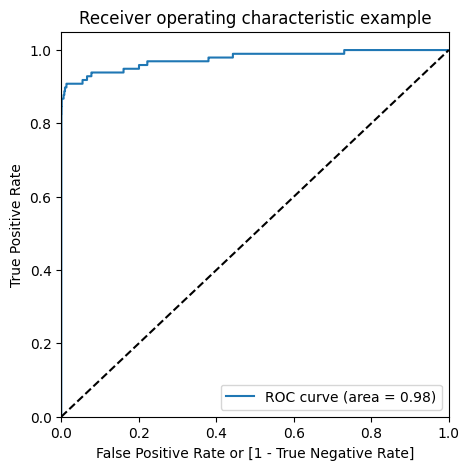

In [121]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.87%
- Test set
    - ROC score : 98%
    - F1 score: 49.13%

## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

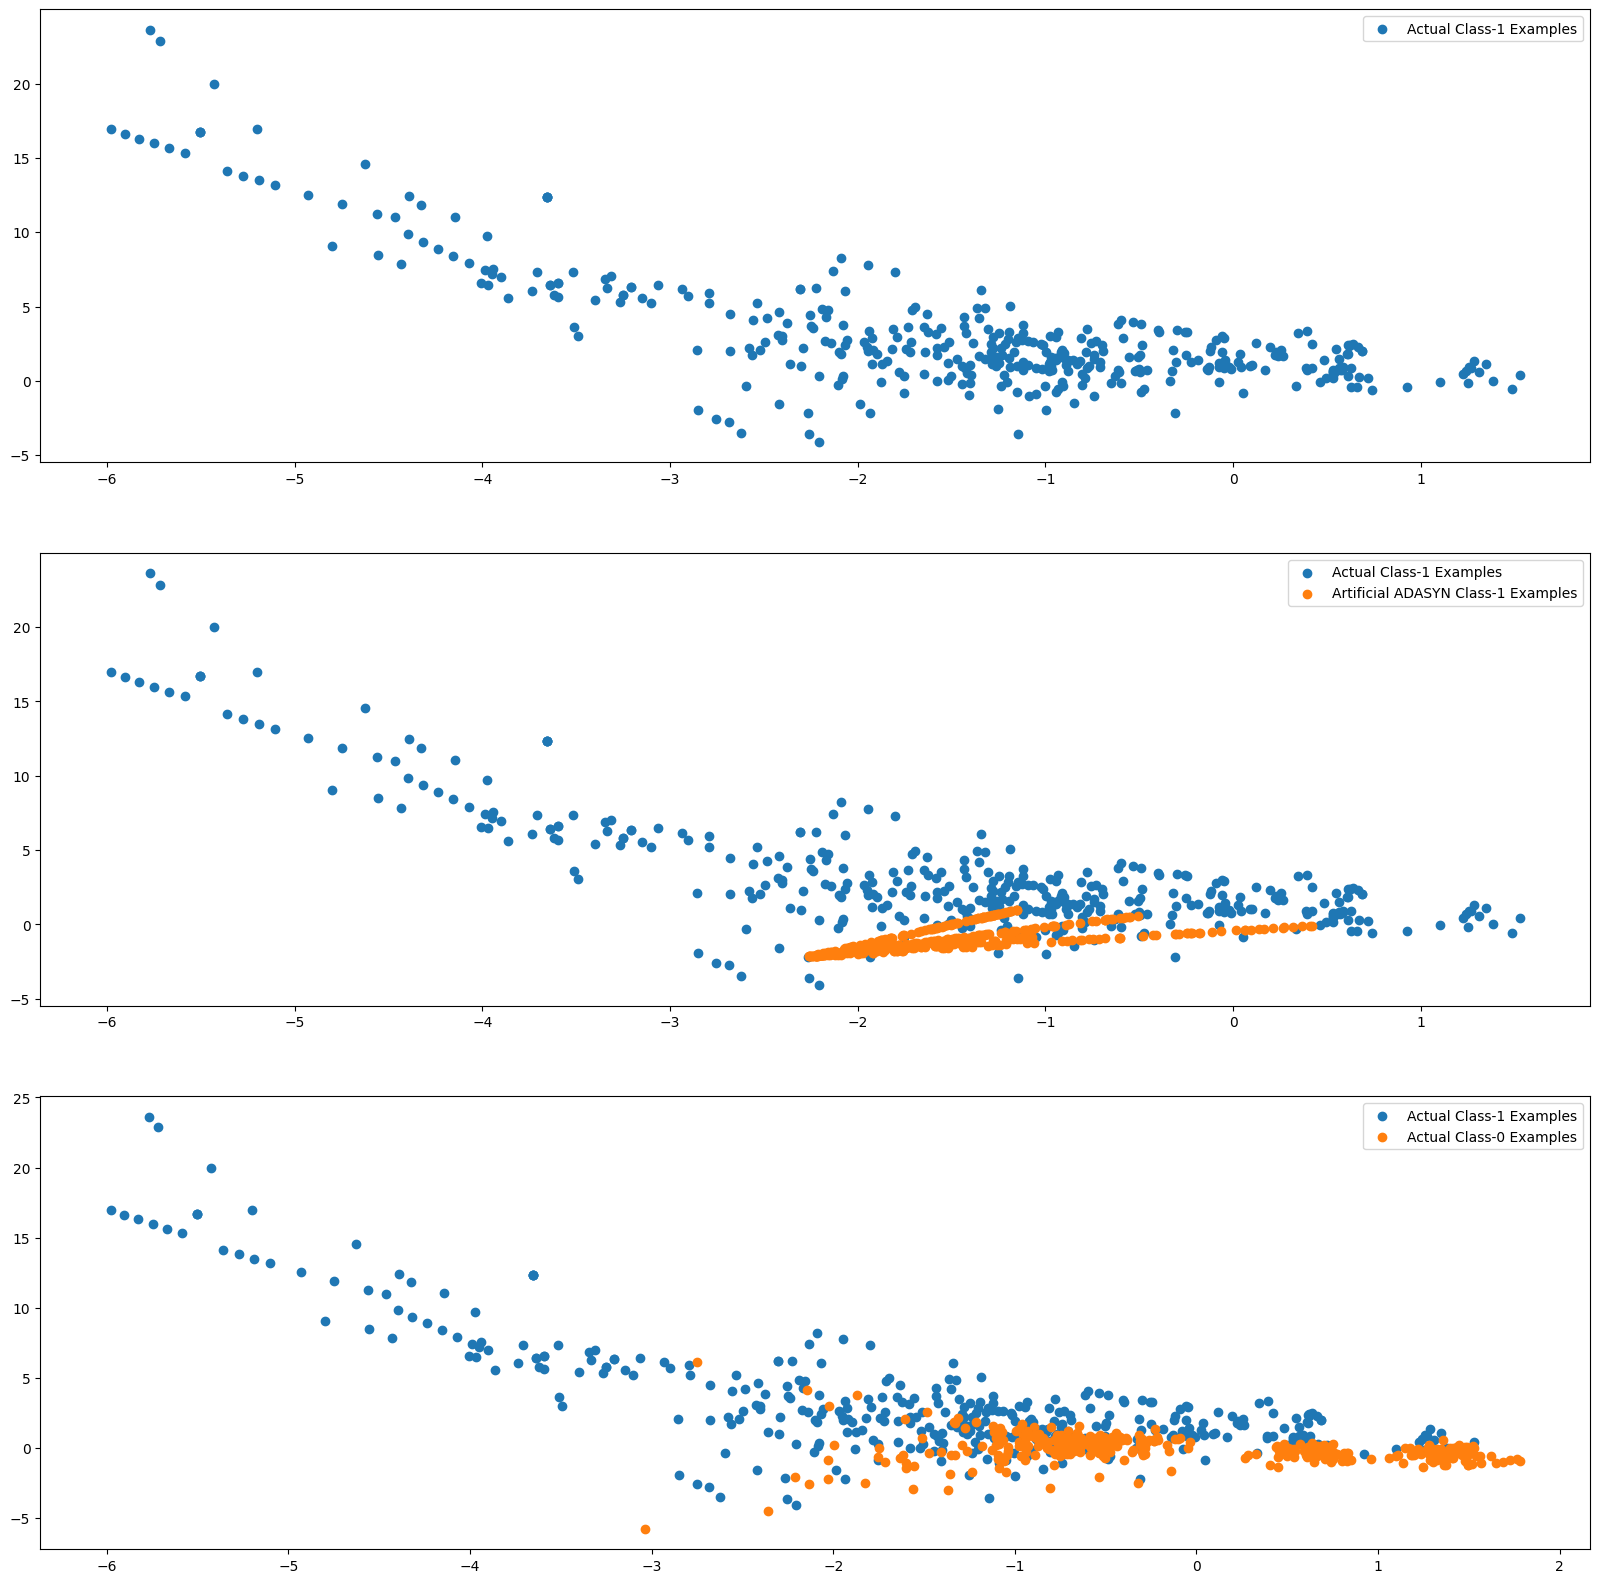

In [122]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with ADASYN

####Hyperparameter Tuning of Logistic Regression Using GridSearchCV with ROC-AUC Evaluation

In [123]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifying score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.965688471682581
Best hyperparameters:  {'C': 1000}


In [124]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       6.540163      0.276986         0.240981        0.044244     0.01   
1       6.880898      0.192164         0.244402        0.047841     0.10   
2       7.015242      0.188734         0.210444        0.002216     1.00   
3       7.010649      0.186110         0.248237        0.050126    10.00   
4       7.042353      0.211321         0.246926        0.045636   100.00   
5       7.010728      0.189148         0.279056        0.044514  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.965199           0.965581           0.965513   
1   {'C': 0.1}           0.965416           0.965821           0.965751   
2     {'C': 1}           0.965437           0.965848           0.965773   
3    {'C': 10}           0.965439           0.965849           0.965776   
4   {'C': 100}           0.965440           0.965849           0.965776   
5  {'C': 1000}           0.965440           0.965849           0.965776   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.965431        0.000166                6            0.965408   
1         0.965663        0.000177                5            0.965656   
2         0.965686        0.000178                4            0.965681   
3         0.965688        0.000178                3            0.965683   
4         0.965688        0.000178                2            0.965683   
5         0.965688        0.000178                1            0.965683   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.965429            0.965579          0.965472         0.000076  
1            0.965661            0.965797          0.965705         0.000066  
2            0.965687            0.965816          0.965728         0.000062  
3            0.965689            0.965818          0.965730         0.000062  
4            0.965689            0.965818          0.965730         0.000062  
5            0.965689            0.965818          0.965730         0.000062

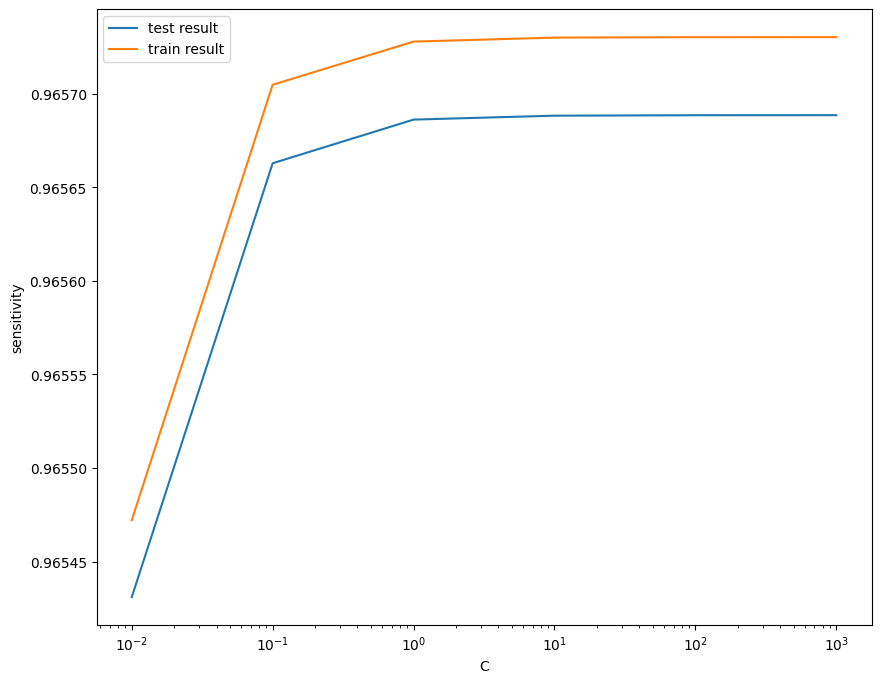

In [125]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [126]:
model_cv.best_params_

{'C': 1000}

In [127]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with Training data

In [128]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 90.29%
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90    227451
           1       0.91      0.90      0.90    227449

    accuracy                           0.90    454900
   macro avg       0.90      0.90      0.90    454900
weighted avg       0.90      0.90      0.90    454900



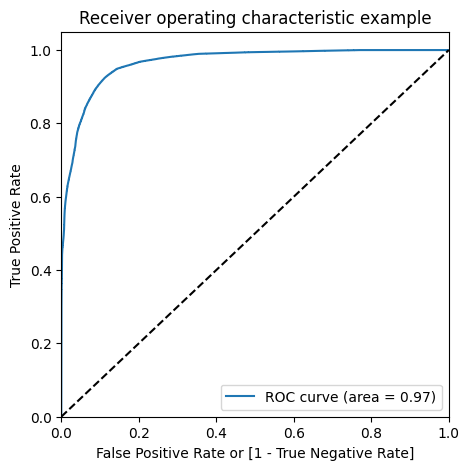

In [129]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating Model performance with test data

In [130]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



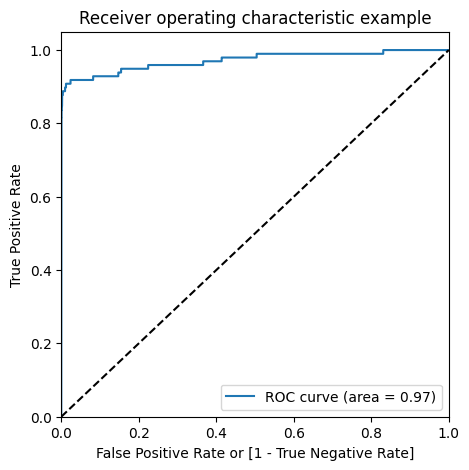

In [131]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 97%
    - F1 score: 90.29%
- Test set
    - ROC score : 97%
    - F1 score: 3.32%

### 2. Decision Tree on balanced data with ADASYN

#### Hyperparameter Tuning for Decision Tree Model Using GridSearchCV



In [132]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [133]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9384874778580272
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [134]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=100,
    max_depth=10,
    min_samples_leaf=50,
    min_samples_split=100
)

# Fit the model on the training data
dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluating the model on training data

In [135]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.04%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227451
           1       0.97      0.99      0.98    227449

    accuracy                           0.98    454900
   macro avg       0.98      0.98      0.98    454900
weighted avg       0.98      0.98      0.98    454900



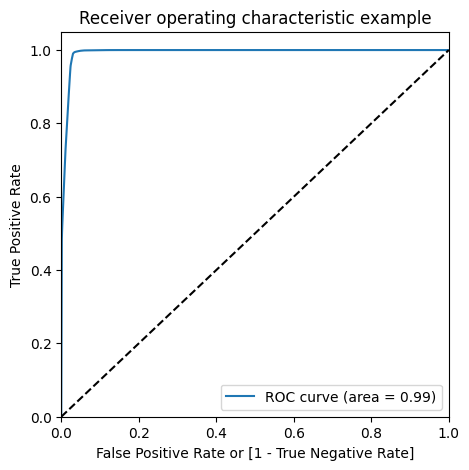

In [136]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model performance on the test set

In [137]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.91%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



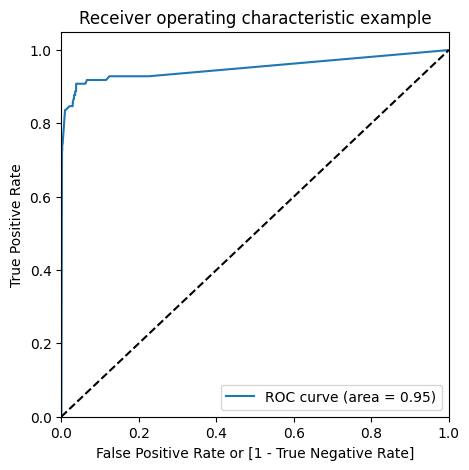

In [138]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 99%
    - F1 score: 98.04%
- Test set
    - ROC score : 95%
    - F1 score: 7.91%

### 3. XGBoost on balanced data with ADASYN

In [139]:
# Creating a KFold object
folds = 3

# Specify range of hyperparameters
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}

# Specify the model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# Set up GridSearchCV
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Fit the model on the training data
model_cv.fit(X_train_adasyn, y_train_adasyn)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [140]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.658065      0.005300         0.078281        0.000194   
1       1.675678      0.046095         0.079280        0.003978   
2       1.830014      0.276187         0.084211        0.012348   
3       1.697670      0.046756         0.078097        0.001502   
4       1.692277      0.016269         0.078619        0.002648   
5       1.630087      0.037933         0.080876        0.003240   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.979651   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.980665   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.980693   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.985092   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.989732   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.987190   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.989710           0.977972         0.982444        0.005183   
1           0.989384           0.979309         0.983119        0.004465   
2           0.991257           0.971916         0.981289        0.007907   
3           0.988049           0.987784         0.986975        0.001336   
4           0.993273           0.981545         0.988183        0.004912   
5           0.990760           0.988788         0.988913        0.001460   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999349            0.998807   
1                4            0.999282            0.998877   
2                6            0.999326            0.998886   
3                3            0.999914            0.999919   
4                2            0.999943            0.999946   
5                1            0.999931            0.999946   

   split2_train_score  mean_train_score  std_train_score  
0            0.998944          0.999033         0.000230  
1            0.998807          0.998989         0.000210  
2            0.998840          0.999017         0.000219  
3            0.999879          0.999904         0.000018  
4            0.999897          0.999929         0.000023  
5            0.999889          0.999922         0.000024

In [141]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9889128402020365
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


#### Model with optimal hyperparameter

In [142]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [143]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#### Evaluating the model on the train data

In [144]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454900
   macro avg       1.00      1.00      1.00    454900
weighted avg       1.00      1.00      1.00    454900



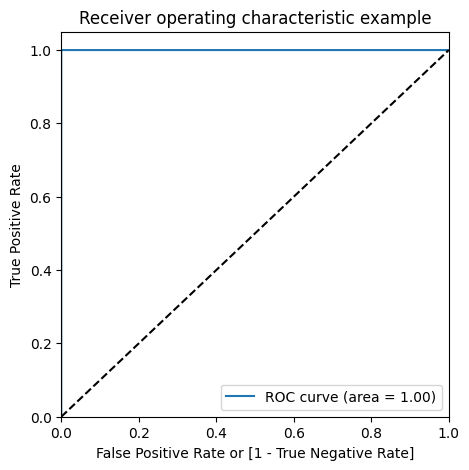

In [145]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [146]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 75.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.83      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.91      0.87     56962
weighted avg       1.00      1.00      1.00     56962



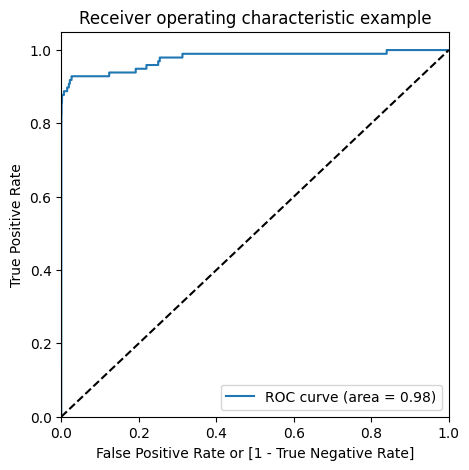

In [147]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Performance Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 75%

### Oversampling Method Selection (Select the oversampling method which shows the best result on a model)
In our approach to address the minority class imbalance, various oversampling techniques is applied, namely Random Oversampling, SMOTE, and ADASYN, to balance the dataset. then built models using Logistic Regression, Random Forest, and XGBoost algorithms on each of these balanced datasets.

Through extensive experimentation, its been observed that the XGBoost model performed the best when trained on the dataset balanced using the ADASYN technique. The results were promising, with the following performance metrics:

Based on these results, the conclusion is that the XGBoost model with ADASYN oversampling is the most effective model for this task.
_________
Train set
ROC score : 100.0%,
F1 score: 100.0%

Test set
ROC score : 98%,
F1 score: 75%
________
making its the best choice for our casestudy credit card fraud detection.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


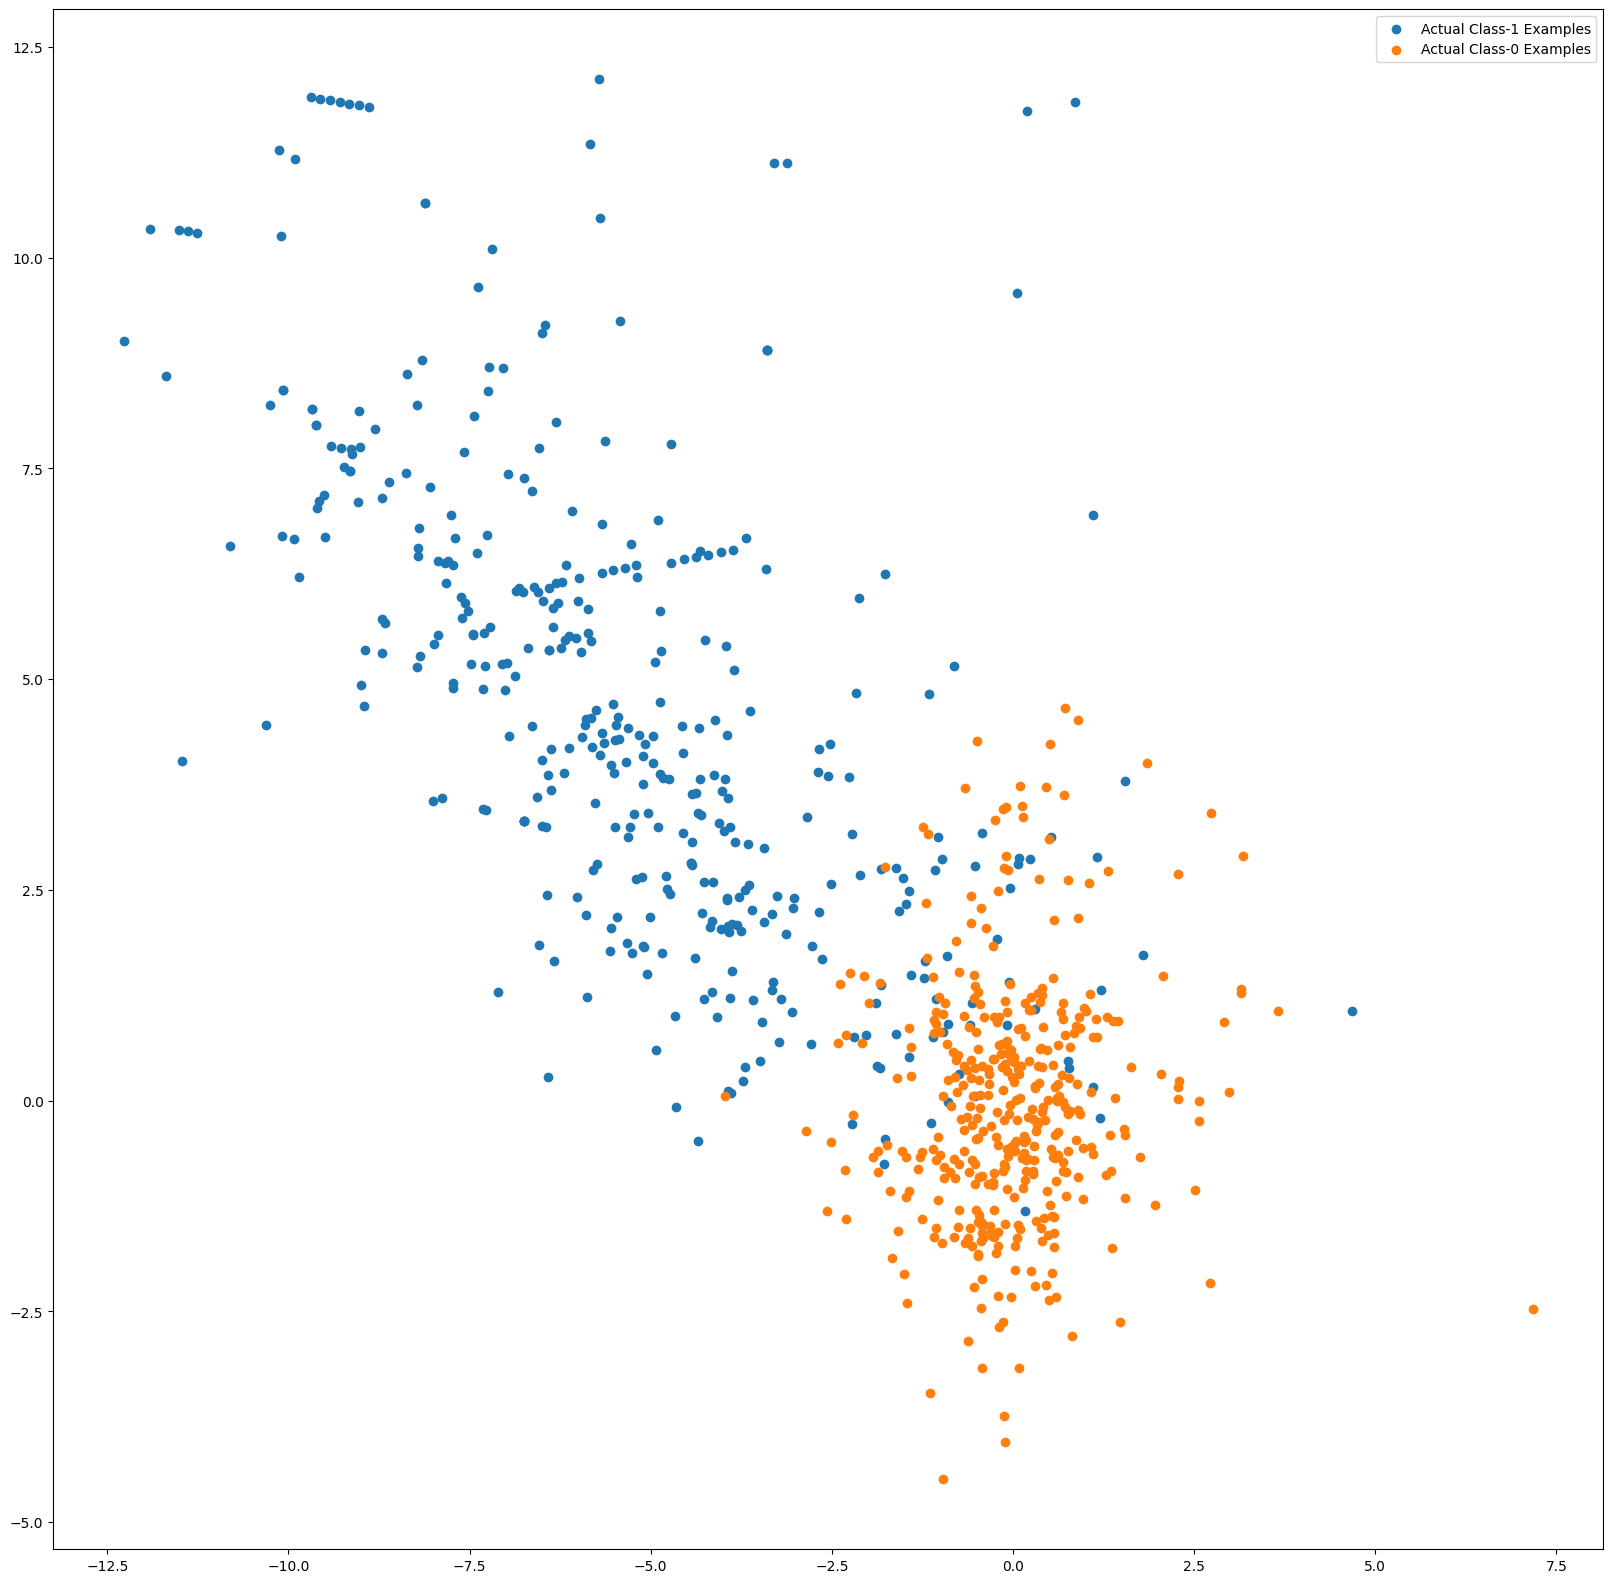

In [148]:
# Extract feature importances from the XGBoost model
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)

# Identify the top 3 features based on feature importance
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variables on Index-13 and Index-9 are identified as the top two features
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

# Separate the data for Class-1 and Class-0 examples
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Shuffle Class-0 examples to avoid any unintended pattern
np.random.shuffle(X_train_0)

# Plot the scatter plot for the top 2 features
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

# Scatter plot showing top feature importance for both classes
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()


#### Print the FPR,TPR & select the best threshold from the roc curve

In [149]:
# Calculate ROC-AUC score for the training set
print('Train AUC =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))

# Generate ROC curve data (FPR, TPR, thresholds)
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)

# Find the optimal threshold where the difference between TPR and FPR is maximized
threshold = thresholds[np.argmax(tpr - fpr)]
print('Optimal Threshold (89%):', threshold)

# Print the FPR, TPR, and corresponding thresholds
print('False Positive Rate (FPR):', fpr)
print('True Positive Rate (TPR):', tpr)
print('Thresholds:', thresholds)


Train AUC = 1.0
Optimal Threshold (89%): 0.9040744
False Positive Rate (FPR): [0.         0.         0.         ... 0.99989888 0.99991647 1.        ]
True Positive Rate (TPR): [0.0000000e+00 2.1982950e-05 1.3629429e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00]
Thresholds: [          inf 9.9999928e-01 9.9999893e-01 ... 5.4317783e-11 5.0581480e-11
 1.1128838e-11]


This analysis shows that the threshold of 89% yields the best performance, achieving a 100% ROC score for the model on the training data.

##Why ADASYN Outperforms Random Oversampling Despite Lower F1 Score with XGBoost?
Even though **f1 score** ( **76.15%**) in XGBoost random oversampling looks better with **ROC score** : **98%**, than the chosen model **XGBoost and ADASYN** with **ROC score** :**98%** and **f1 score**:**75**%, it can be misleading.

Random Oversampling just copies the same fraud cases again and again.
This can make the model memorize instead of learn.
→ It performs well on training but may fail on new data.

ADASYN creates new, realistic fake frauds.
This helps the model understand fraud patterns better.
→ It might give a lower F1 score, but it’s more reliable on real-world data.

# Summary

**Thoughtful Decision to Use XGBoost for Credit Card Fraud Detection:**

In the fight against credit card fraud, our main focus is on maximizing recall. A high recall ensures that the model catches a large number of actual fraudulent transactions, which is crucial for minimizing losses and protecting financial institutions' reputations. Prioritizing recall is vital, as it directly impacts the ability of banks to safeguard both their finances and customer trust.

**Evaluation and Selection of the Best Model:**

Throughout the analysis, and experiencing with multiple machine learning models and applied the ADASYN (Adaptive Synthetic Sampling) technique to address the imbalance in the dataset. Among all models tested, XGBoost proved to be the most effective. Here are the **key findings:**

**ROC Score:** The XGBoost model achieved a remarkable ROC score of 98%, showcasing its ability to accurately distinguish between fraudulent and non-fraudulent transactions.

**F1 Score:** The XGBoost model achieved a good score of 75%, showcasing that the model's performance is fairly balanced between precision and recall.

**Recall Rate**: Most notably, XGBoost delivered an impressive recall rate of fraud class 83% on the balanced dataset, which is crucial in ensuring that fraudulent transactions are effectively identified.

Rationale for Choosing XGBoost
Upon evaluating all metrics, the XGBoost model, combined with the ADASYN method on a balanced dataset, stands out as the optimal choice for credit card fraud detection. Its excellent ROC score and high recall rate make it particularly effective at identifying fraud, which is the top priority in this application.

By leveraging the power of **XGBoost and ADASYN**, banks can enhance their fraud detection systems, improving their ability to prevent fraudulent transactions and better protect both their financial resources and customer trust in a rapidly evolving fraud landscape.